In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor

#from ydata_profiling import ProfileReport


Metadata:

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

### 1. Importing data

In [2]:
# Excel file comes already with column names, but for practicing purposes let's import csv file and add collumn names using python.

#df_excel=pd.read_excel("regression_data_excel.xls")
#df_excel.head()

In [3]:
df = pd.read_csv("regression_data.csv", header = None)
df.head()

0         1   2     3     4      5    6   7   8   9   10    11  \
0  7129300520  10/13/14   3  1.00  1180   5650  1.0   0   0   3   7  1180   
1  6414100192   12/9/14   3  2.25  2570   7242  2.0   0   0   3   7  2170   
2  5631500400   2/25/15   2  1.00   770  10000  1.0   0   0   3   6   770   
3  2487200875   12/9/14   4  3.00  1960   5000  1.0   0   0   5   7  1050   
4  1954400510   2/18/15   3  2.00  1680   8080  1.0   0   0   3   8  1680   

    12    13    14     15       16       17    18    19      20  
0    0  1955     0  98178  47.5112 -122.257  1340  5650  221900  
1  400  1951  1991  98125  47.7210 -122.319  1690  7639  538000  
2    0  1933     0  98028  47.7379 -122.233  2720  8062  180000  
3  910  1965     0  98136  47.5208 -122.393  1360  5000  604000  
4    0  1987     0  98074  47.6168 -122.045  1800  7503  510000

In [4]:
#Adding columns to dataframe

df.columns = ['id', 'date', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
df.head()

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

In [ ]:
#sql_data = df.copy()
#sql_data.to_csv("real_estate.csv", header = True, index = False)

#### 1.1 General Glimpse

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [6]:
df.shape

(21597, 21)

In [7]:
df.describe().round(1)

id  bedrooms  bathrooms  sqft_living   sqft_lot   floors  \
count  2.159700e+04   21597.0    21597.0      21597.0    21597.0  21597.0   
mean   4.580474e+09       3.4        2.1       2080.3    15099.4      1.5   
std    2.876736e+09       0.9        0.8        918.1    41412.6      0.5   
min    1.000102e+06       1.0        0.5        370.0      520.0      1.0   
25%    2.123049e+09       3.0        1.8       1430.0     5040.0      1.0   
50%    3.904930e+09       3.0        2.2       1910.0     7618.0      1.5   
75%    7.308900e+09       4.0        2.5       2550.0    10685.0      2.0   
max    9.900000e+09      33.0        8.0      13540.0  1651359.0      3.5   

       waterfront     view  condition    grade  sqft_above  sqft_basement  \
count     21597.0  21597.0    21597.0  21597.0     21597.0        21597.0   
mean          0.0      0.2        3.4      7.7      1788.6          291.7   
std           0.1      0.8        0.7      1.2       827.8          442.7   
min           0.0      0.0        1.0      3.0       370.0            0.0   
25%           0.0      0.0        3.0      7.0      1190.0            0.0   
50%           0.0      0.0        3.0      7.0      1560.0            0.0   
75%           0.0      0.0        4.0      8.0      2210.0          560.0   
max           1.0      4.0        5.0     13.0      9410.0         4820.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
count   21597.0       21597.0  21597.0  21597.0  21597.0        21597.0   
mean     1971.0          84.5  98078.0     47.6   -122.2         1986.6   
std        29.4         401.8     53.5      0.1      0.1          685.2   
min      1900.0           0.0  98001.0     47.2   -122.5          399.0   
25%      1951.0           0.0  98033.0     47.5   -122.3         1490.0   
50%      1975.0           0.0  98065.0     47.6   -122.2         1840.0   
75%      1997.0           0.0  98118.0     47.7   -122.1         2360.0   
max      2015.0        2015.0  98199.0     47.8   -121.3         6210.0   

       sqft_lot15      price  
count     21597.0    21597.0  
mean      12758.3   540296.6  
std       27274.4   367368.1  
min         651.0    78000.0  
25%        5100.0   322000.0  
50%        7620.0   450000.0  
75%       10083.0   645000.0  
max      871200.0  7700000.0

## 2. Data Cleaning

In [8]:
df.id.nunique()

# 21420 unique ID's, which means there are 177 houses are duplicate, meaning were sold more than once.

21420

In [9]:
# Drop id column

df.drop(['id'], axis=1, inplace=True)

In [10]:
# Change from float to int datatype.

df[['bathrooms', 'floors']] = df[['bathrooms', 'floors']].astype(int)
df.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3          1         1180      5650       1           0   
1   12/9/14         3          2         2570      7242       2           0   
2   2/25/15         2          1          770     10000       1           0   
3   12/9/14         4          3         1960      5000       1           0   
4   2/18/15         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15   price  
0    98178  47.5112 -122.257           1340        5650  221900  
1    98125  47.7210 -122.319           1690        7639  538000  
2    98028  47.7379 -122.233           2720        8062  180000  
3    98136  47.5208 -122.393           1360        5000  604000  
4    98074  47.6168 -122.045           1800        7503  510000

In [11]:
# Transform date from object to datetime format so we are able to extract days and months to new columns.

df['date']=pd.to_datetime(df['date'])

In [12]:
df.date.unique().min()

numpy.datetime64('2014-05-02T00:00:00.000000000')

In [13]:
df.date.unique().max()

numpy.datetime64('2015-05-27T00:00:00.000000000')

In [14]:
# Extract day and month from date to new columns

df['weekday']=df['date'].dt.day
df['month']=df['date'].dt.month

In [15]:
# changing sqft to sqm

df['sqm_living'] = round(df['sqft_living'] * 0.09290304, 0)
df['sqm_lot'] = round(df['sqft_lot'] * 0.09290304, 0)
df['sqm_above'] = round(df['sqft_above'] * 0.09290304, 0)
df['sqm_basement'] = round(df['sqft_basement'] * 0.09290304, 0)
df['sqm_living15'] = round(df['sqft_living15'] * 0.09290304, 0)
df['sqm_lot15'] = round(df['sqft_lot15'] * 0.09290304, 0)

In [16]:
#Drop unnecessary columns

df.drop(['date', 'zipcode', 'lat', 'long', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [17]:
#Move our target to the right

df = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'weekday', 'month', 'sqm_living', 'sqm_lot',
       'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15', 'price']]

In [18]:
# column 'bedrooms'

df.bedrooms.value_counts()

# Ranges from 3 bedrooms houses to 33 bedrooms.

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
# column 'bathrooms'

df.bathrooms.value_counts()

2    10539
1     8353
3     2228
4      338
0       75
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [20]:
# column 'floors'

df.floors.value_counts()

1    12583
2     8396
3      618
Name: floors, dtype: int64

In [21]:
# column 'waterfront'

df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [22]:
# column 'view'

df.view.value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [23]:
# column 'condition'

df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [24]:
# column 'grade'

df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [25]:
# column 'yr_built'

df.yr_built.unique().min()


1900

In [26]:
df.yr_built.unique().max()

2015

In [27]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [28]:
# column 'yr_renovated'

df.yr_renovated.unique().min()

0

In [29]:
df.yr_renovated.unique().max()

2015

## 3. Baseline Models

#### Let's run a our models before the Preprocessing to have a benchmark on our metrics so we can compare after.

### 3.1 Apply Linear Regression Model

#### 3.1.1 X-y split

In [30]:
X = df.drop(['price'], axis=1)
y = df['price']

#### 3.1.2 Train-Test Split

In [31]:
# Separate train and test datasets. 30% --> test , 70% --> train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
len(X_train)

15117

In [33]:
y_train

753       699800
1418     1700000
8178      258000
2254      245000
4063      373000
          ...   
11964     440000
21575     572000
5390      299800
860       245000
15795     545000
Name: price, Length: 15117, dtype: int64

In [34]:
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

#### 3.1.3 Model Validation

In [35]:
predictions  = model.predict(X_test)
predictions

array([100788.22600582, 308380.8449456 , 325454.62050192, ...,
       295267.97528874, 546633.81949782, 249461.12290595])

In [36]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.63325513759863
RMSE =  220521.6681860868
MSE =  48629806139.57458


In [37]:
#Create dataframe for visualising the differences between real and predicted values

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true          pred           diff
3686    132500  1.007882e+05   31711.773994
10247   415000  3.083808e+05  106619.155054
4037    494000  3.254546e+05  168545.379498
3437    355000  2.809573e+05   74042.669833
19291   606000  3.938632e+05  212136.759857
...        ...           ...            ...
9400   1010000  7.165508e+05  293449.232414
9092    675000  1.064076e+06  389075.673091
6650    442500  2.952680e+05  147232.024711
21095   424950  5.466338e+05  121683.819498
3372    356000  2.494611e+05  106538.877094

[6480 rows x 3 columns]

<AxesSubplot:xlabel='true', ylabel='pred'>

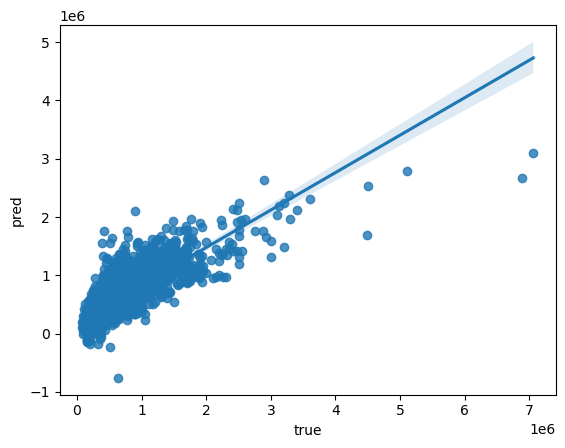

In [38]:
sns.regplot(results['true'], results['pred'])

In [39]:
px.scatter(x=results['true'], y=results['pred'], trendline='ols').update_layout(xaxis_title="true", yaxis_title="pred")

In [40]:
#function to try different models

def different_models(models):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = models
    model.fit(X_train,y_train) 
    
    #predictions

    predictions = model.predict(X_test)
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = predictions
    results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
    
    #metrics for evaluation
    r2 = r2_score(y_test, predictions)
    RMSE = mean_squared_error(y_test, predictions, squared=False)
    MSE = mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    
    print("The R2 of the model in the test set is: %4.2f" % (r2))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The mean absolute error of the model in the test set is: " , MAE)
    
    fig=px.scatter(x=results['true'], y=results['pred'], trendline='ols').update_layout(xaxis_title="true", yaxis_title="pred")
    fig.show()

### 3.2 Apply  K-nearest neighbors (KNN) Regression Model 

The R2 of the model in the test set is: 0.50
The root mean squared error of the model in the test set is: 258590.49
The mean squared error of the model in the test set is: 66869043872.23
The mean absolute error of the model in the test set is:  150321.9049074074


<AxesSubplot:xlabel='true', ylabel='pred'>

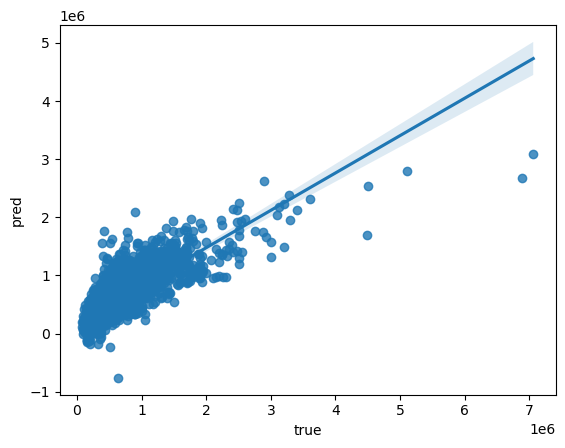

In [41]:
different_models(KNeighborsRegressor(n_neighbors=10))
sns.regplot(results['true'], results['pred'])

   #### 3.2.1 Getting the best K

In [42]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,20): #loop, we try different K's between 2-20
    model = KNeighborsRegressor(n_neighbors=i)  #we apply model
    model.fit(X_train, y_train)   #we train
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

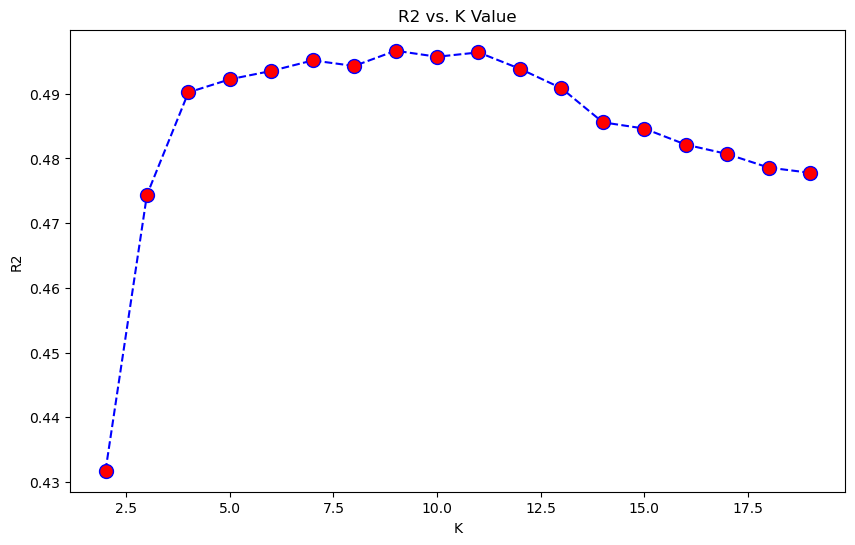

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')


##### Best K score seems to be around 9!

##### The distance from the point predicted to its nearest K neighbors can be very relevant too.
##### Let's run the model again with K of 9 and with weights = "distance"

The R2 of the model in the test set is: 0.51
The root mean squared error of the model in the test set is: 255602.61
The mean squared error of the model in the test set is: 65332691727.72
The mean absolute error of the model in the test set is:  148780.34188365907


<AxesSubplot:xlabel='true', ylabel='pred'>

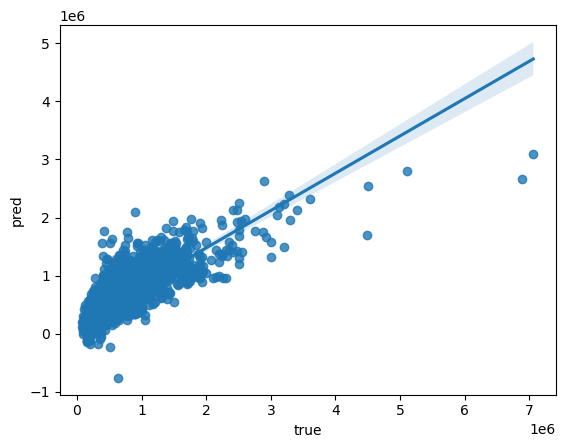

In [44]:
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
sns.regplot(results['true'], results['pred'])

### 3.3 Apply Random Forest Regressor Model

The R2 of the model in the test set is: 0.75
The root mean squared error of the model in the test set is: 182531.06
The mean squared error of the model in the test set is: 33317588113.31
The mean absolute error of the model in the test set is:  116409.27541599794


<AxesSubplot:xlabel='true', ylabel='pred'>

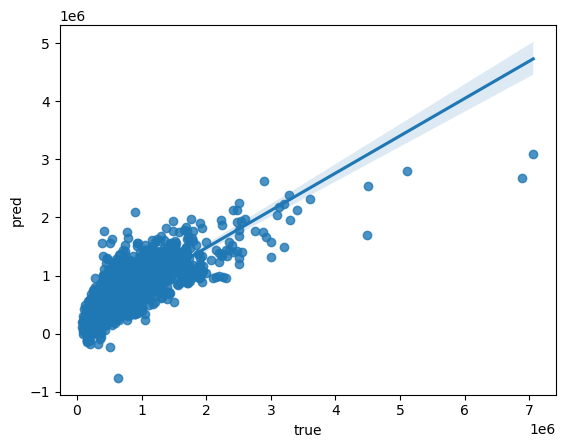

In [45]:
different_models(RandomForestRegressor(n_estimators=100, random_state=42))
sns.regplot(results['true'], results['pred'])

#random_state controls the randomness of the bootstrapping of the samples used when building trees.
#n_estimators: the number of trees.

Baseline Models Metrics:

**Linear Regression**: R2 0.63

**KNN Regressor**: R2 0.51

**RandomForest Regressor**: R2 0.75

## 4. Exploratory Data Analysis

In [ ]:
# EDA report

#eda_report = ProfileReport(df, title = "Report")
#eda_report

In [ ]:
#eda_report.to_file("EDA_report.html")

#### 4.1 Extract continuous numerical variables

In [46]:
continuous_numerical = df[['sqm_living', 'sqm_lot', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15', 'price']]
continuous_numerical.describe()

sqm_living        sqm_lot     sqm_above  sqm_basement  sqm_living15  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean     193.266935    1402.784970    166.162430     27.100755    184.564708   
std       85.297599    3847.356808     76.907487     41.121096     63.663646   
min       34.000000      48.000000     34.000000      0.000000     37.000000   
25%      133.000000     468.000000    111.000000      0.000000    138.000000   
50%      177.000000     708.000000    145.000000      0.000000    171.000000   
75%      237.000000     993.000000    205.000000     52.000000    219.000000   
max     1258.000000  153416.000000    874.000000    448.000000    577.000000   

          sqm_lot15         price  
count  21597.000000  2.159700e+04  
mean    1185.291661  5.402966e+05  
std     2533.875314  3.673681e+05  
min       60.000000  7.800000e+04  
25%      474.000000  3.220000e+05  
50%      708.000000  4.500000e+05  
75%      937.000000  6.450000e+05  
max    80937.000000  7.700000e+06

In [ ]:
# Plotting Distribution of our Continuous Numerical Variables

#for column in continuous_numerical.columns:
    #sns.distplot(continuous_numerical[column])
    #plt.show()

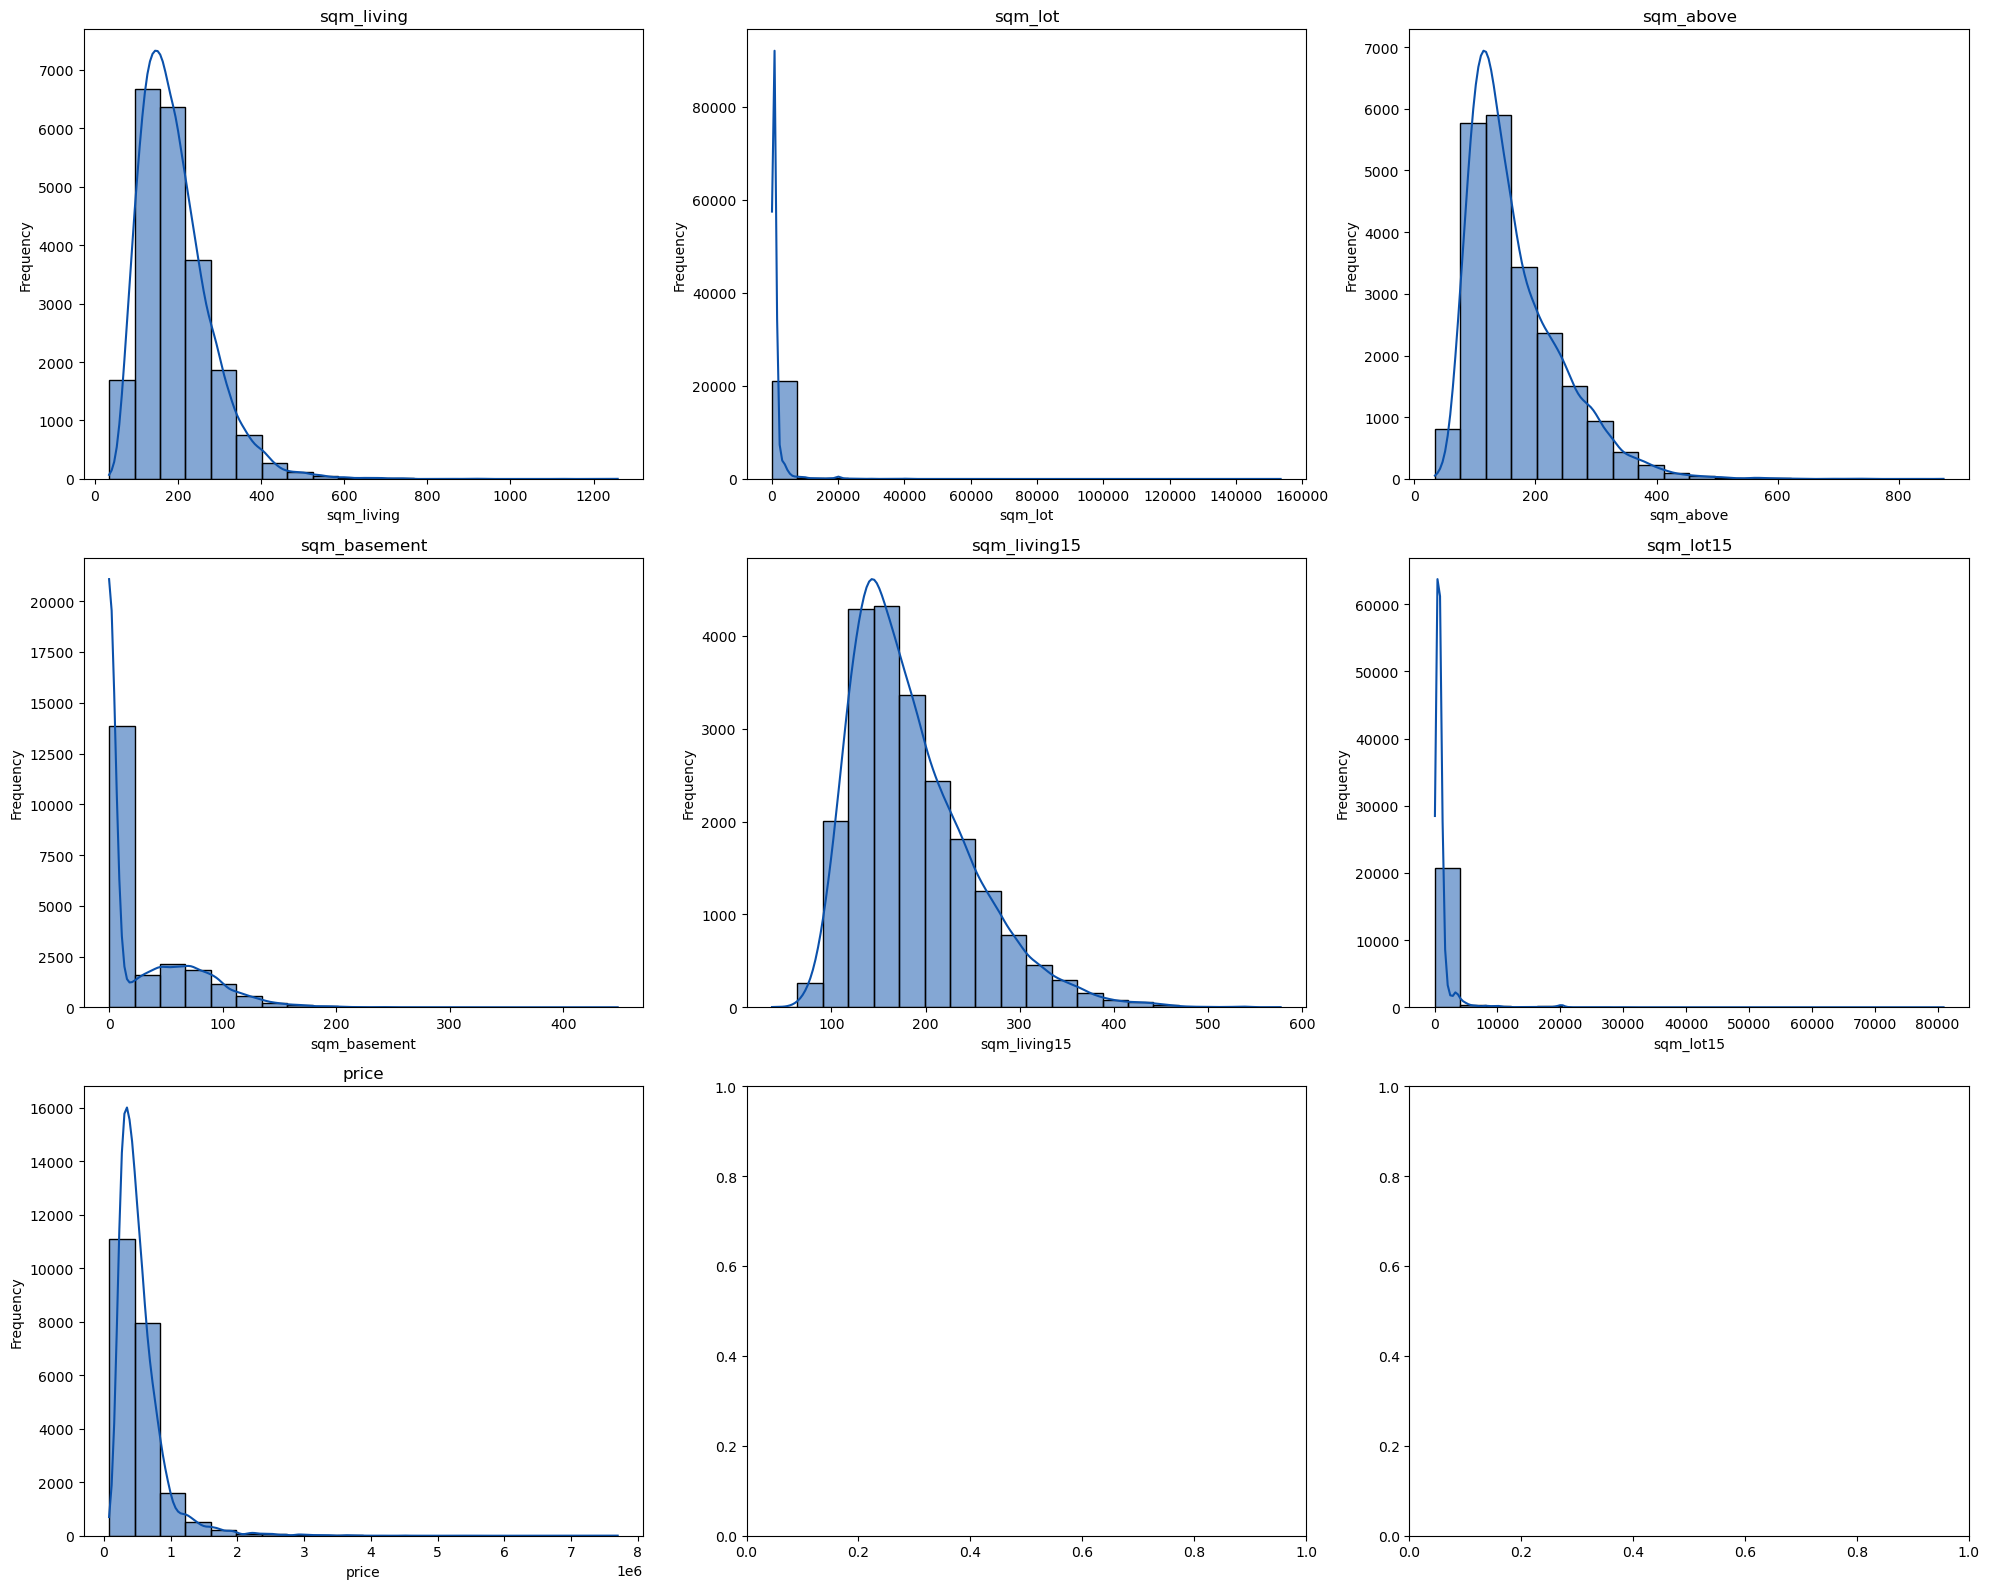

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 16))
color = '#0B51AB'  
for i, ax in enumerate(axes.flat):
    if i >= len(continuous_numerical.columns):
        break
    sns.histplot(data=continuous_numerical, x=continuous_numerical.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(continuous_numerical.columns[i])
    ax.set_xlabel(continuous_numerical.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can see right skewed distribution for most of our columns.  We will have to apply Transformers on our continuous variables later to make our data closer to normal distribution, which is important to increase performance of our Linear Regression Model.


In [ ]:
# Plotting an histogram to analyse numerical columns distribution

#continuous_numerical.hist(figsize=(10, 25),layout=(9,3))

In [ ]:
#Let's analyse relationship between numerical variables:

sns.pairplot(continuous_numerical)


#### 4.2 Extract discrete numerical variables

In [48]:
discrete_numerical=df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']]
discrete_numerical.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade
0         3          1       1           0     0          3      7
1         3          2       2           0     0          3      7
2         2          1       1           0     0          3      6
3         4          3       1           0     0          5      7
4         3          2       1           0     0          3      8

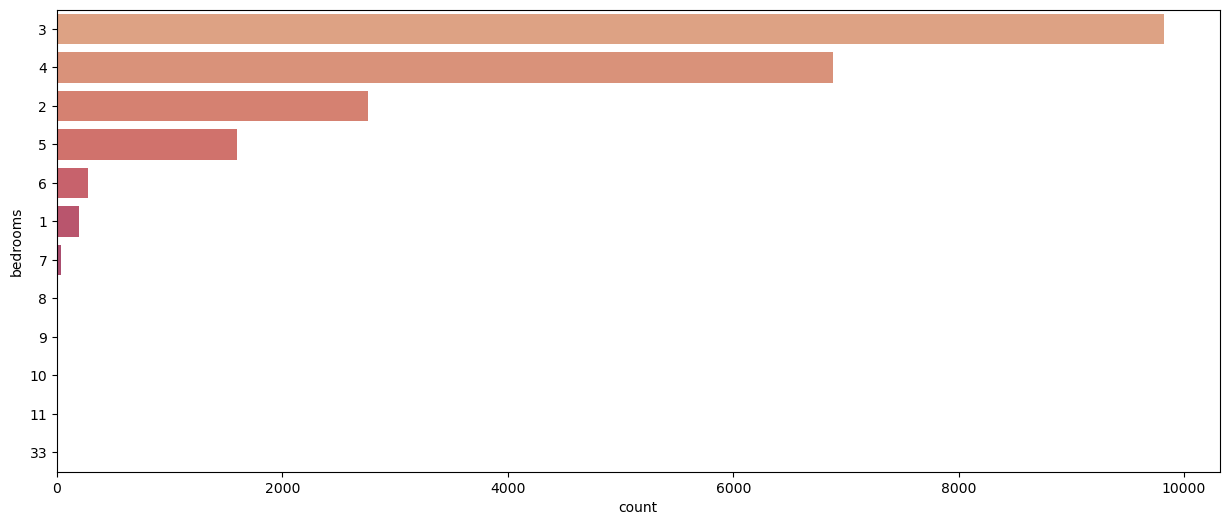

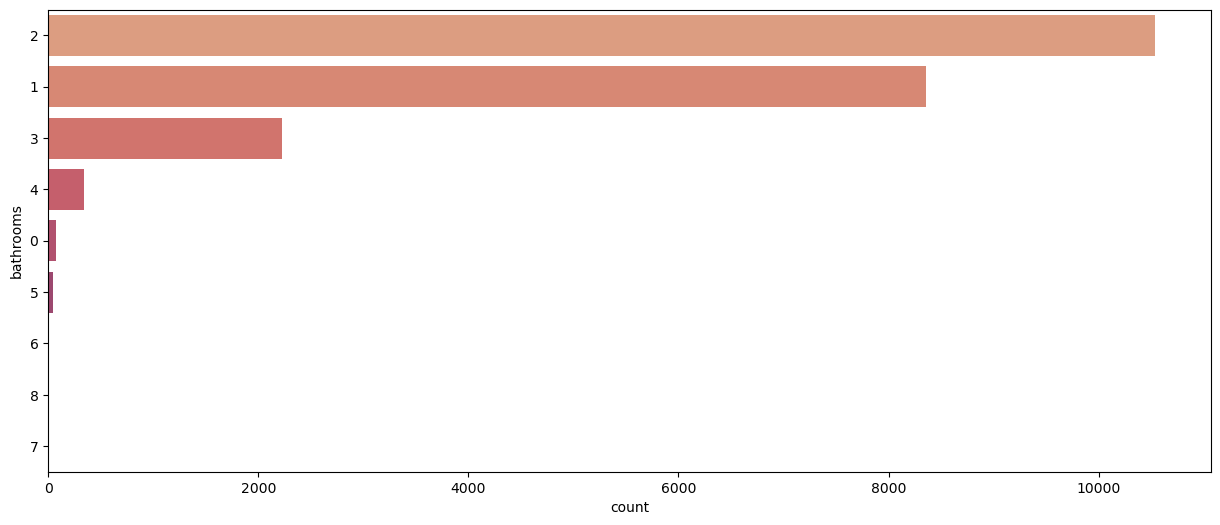

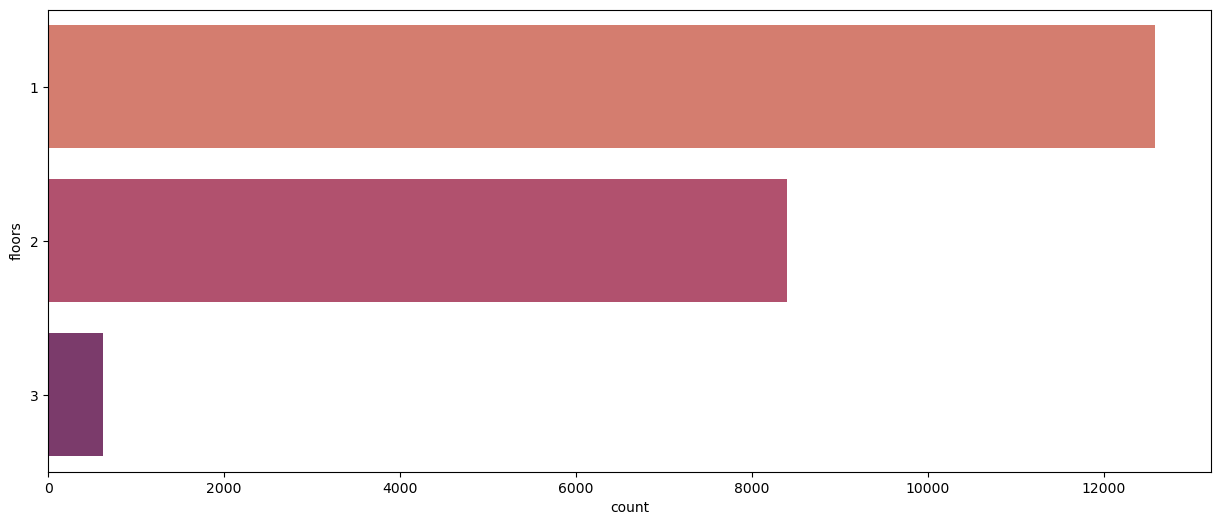

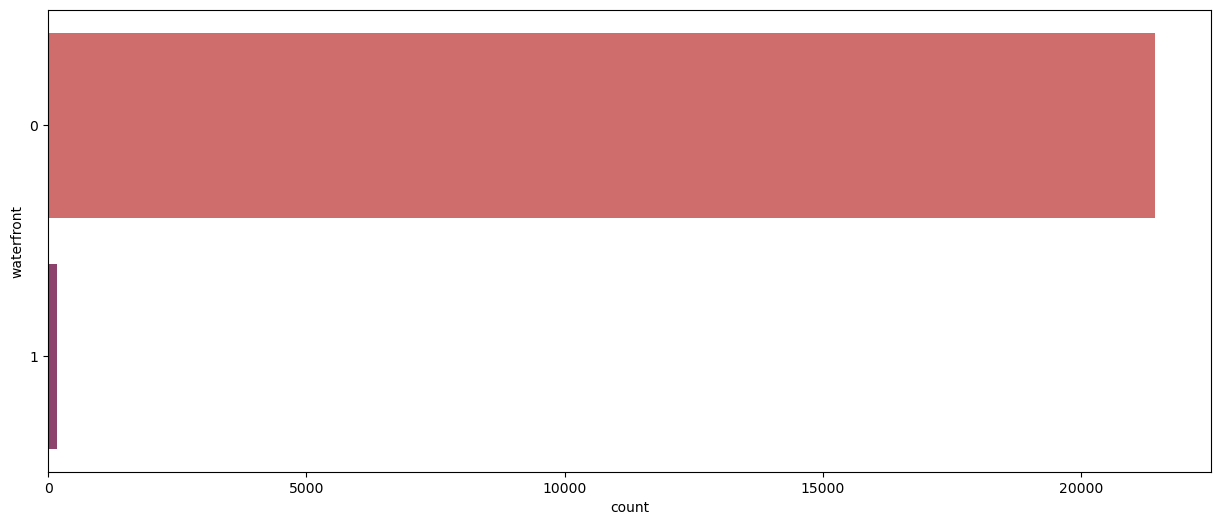

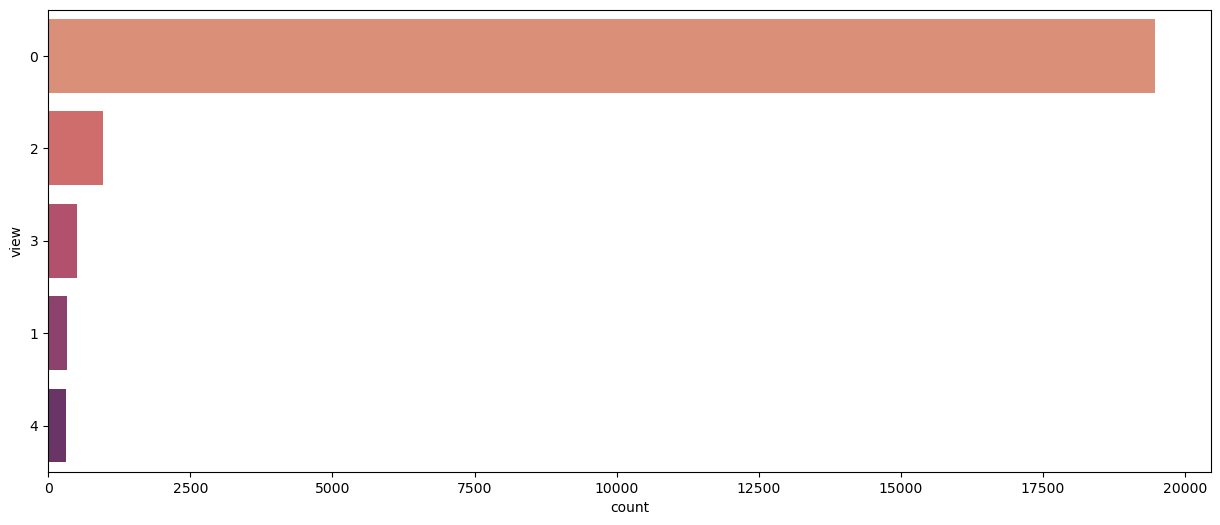

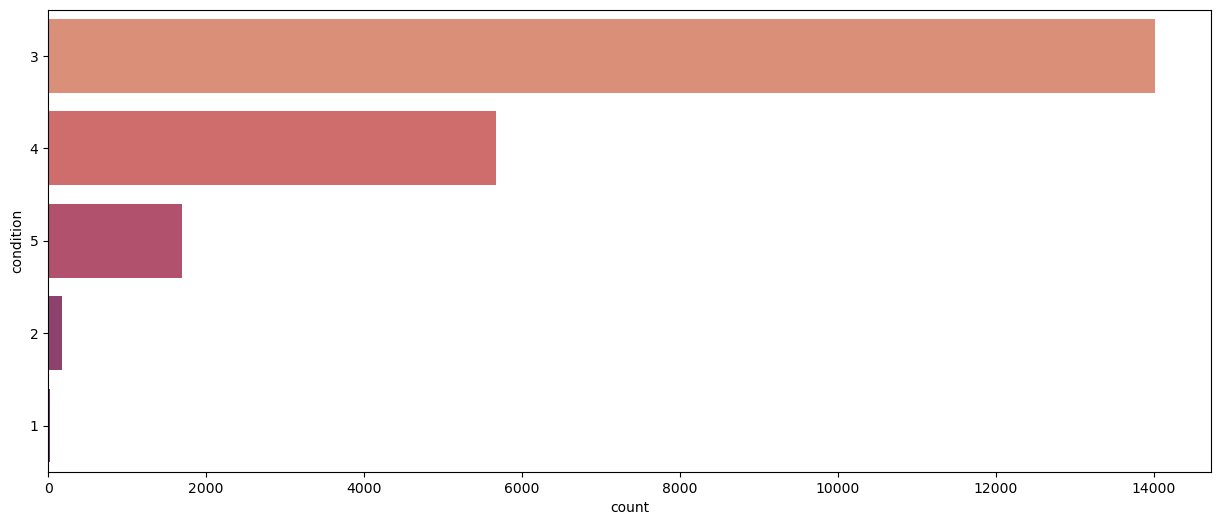

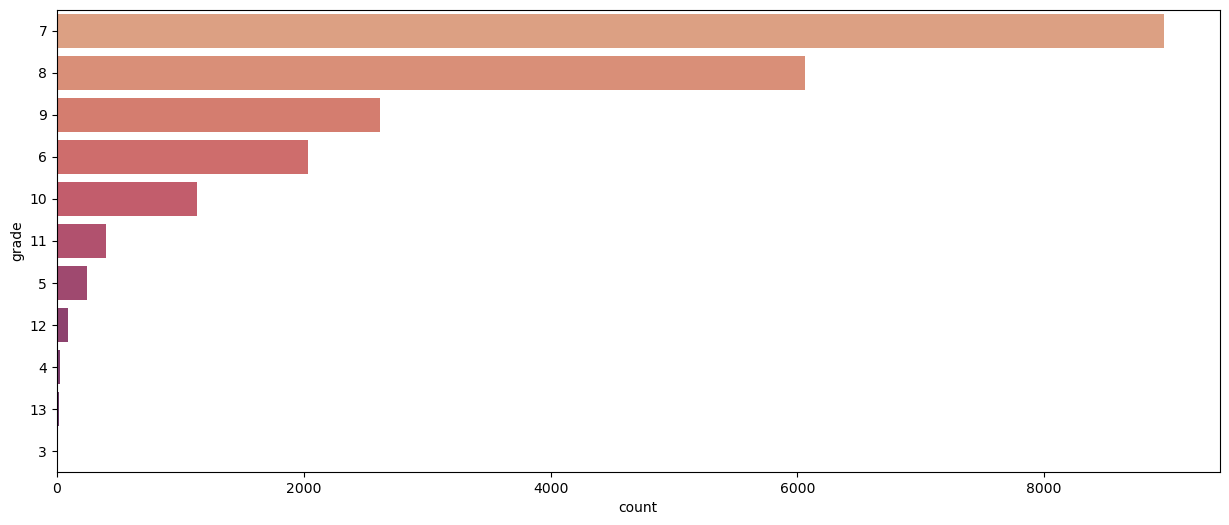

In [49]:
#Let's visualize each discrete variable separately.

columns=discrete_numerical.columns
for i in columns:
    fig, ax=plt.subplots(1,1, figsize=(15,6))  #creates a fig
    sns.countplot(y=discrete_numerical[i][1:],data=discrete_numerical.iloc[1:], order=discrete_numerical[i][1:].value_counts().index, palette='flare')


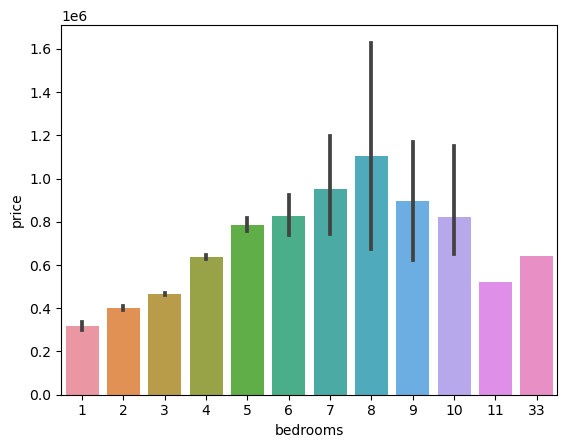

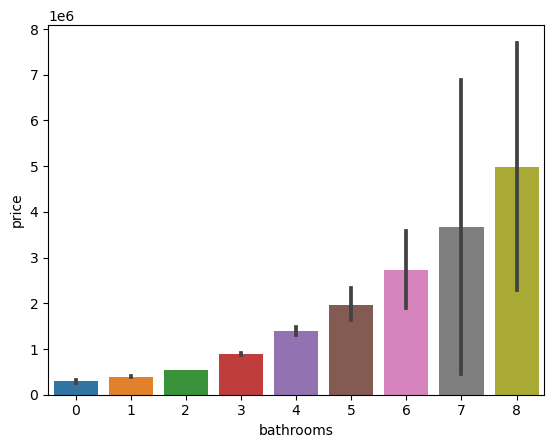

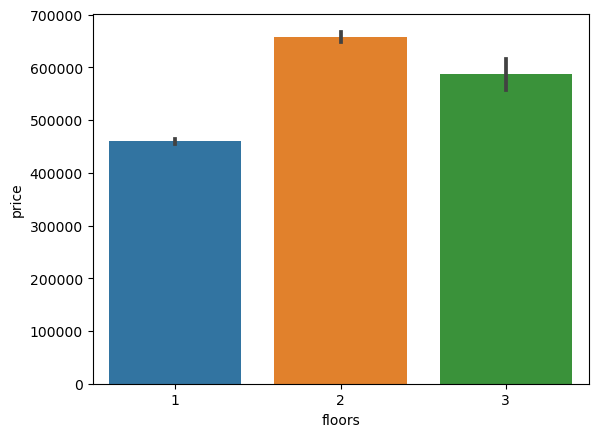

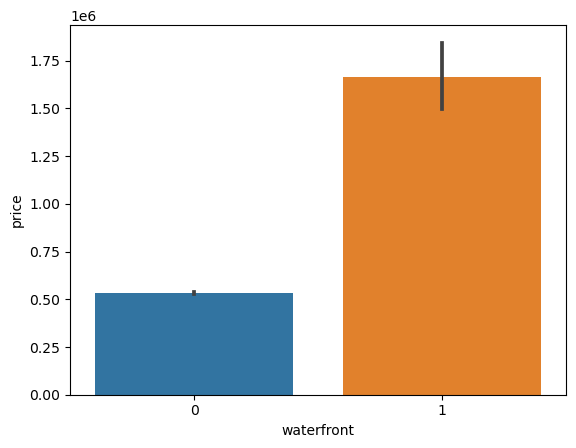

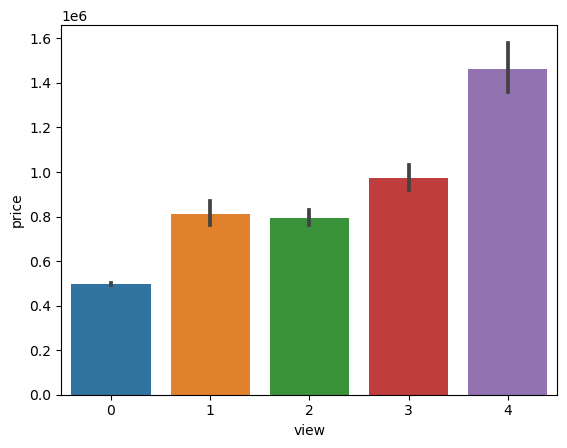

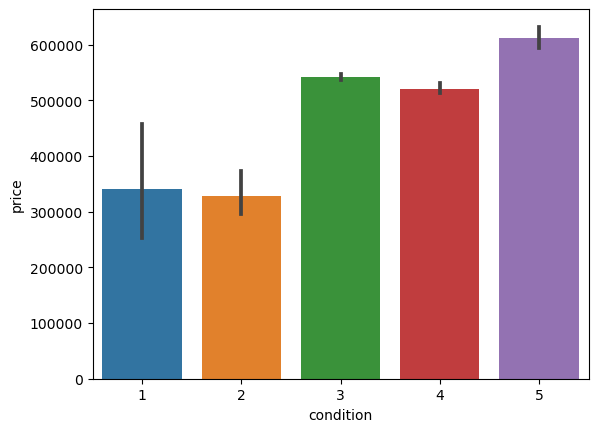

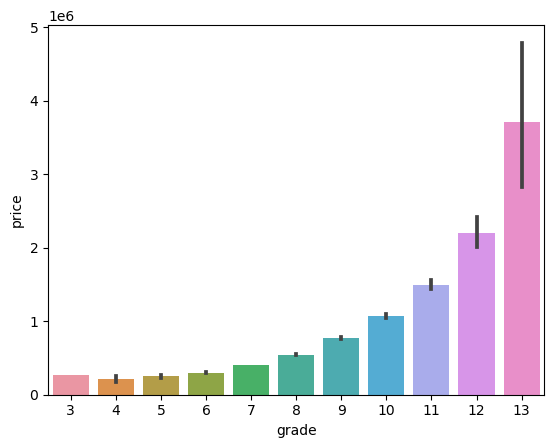

In [50]:
# Visualize discrete data with Target variable "Price"

sns.barplot(x="bedrooms", y="price", data=df)
plt.show()

sns.barplot(x="bathrooms", y="price", data=df)
plt.show()

sns.barplot(x="floors", y="price", data=df)
plt.show()

sns.barplot(x="waterfront", y="price", data=df)
plt.show()

sns.barplot(x="view", y="price", data=df)
plt.show()

sns.barplot(x="condition", y="price", data=df)
plt.show()

sns.barplot(x="grade", y="price", data=df)
plt.show()


In [ ]:
#sns.countplot(x=df['bedrooms'], data=df, palette='hls')
#plt.show()

##### 4.3 Check for **Multicollinearity** between independent variables and **correlation** with our Target variable "price"

In [51]:
#Correlation

correlations_matrix = df.corr()

In [52]:
correlations_matrix=round(correlations_matrix.corr(),2)
correlations_matrix.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
bedrooms        1.00       0.72    0.33       -0.23  0.02      -0.19   0.62   
bathrooms       0.72       1.00    0.73       -0.16  0.08      -0.52   0.89   
floors          0.33       0.73    1.00       -0.17 -0.14      -0.70   0.72   
waterfront     -0.23      -0.16   -0.17        1.00  0.59       0.02  -0.10   
view            0.02       0.08   -0.14        0.59  1.00       0.03   0.18   

            yr_built  yr_renovated  weekday  month  sqm_living  sqm_lot  \
bedrooms        0.33         -0.16    -0.23  -0.21        0.78    -0.16   
bathrooms       0.69         -0.18    -0.26  -0.25        0.89    -0.13   
floors          0.87         -0.22    -0.16  -0.13        0.54    -0.14   
waterfront     -0.24          0.12    -0.10  -0.12       -0.11    -0.15   
view           -0.22          0.10    -0.17  -0.21        0.22    -0.11   

            sqm_above  sqm_basement  sqm_living15  sqm_lot15  price  
bedrooms         0.67          0.37          0.66      -0.15   0.56  
bathrooms        0.88          0.14          0.82      -0.12   0.72  
floors           0.75         -0.44          0.57      -0.14   0.37  
waterfront      -0.14          0.07         -0.08      -0.15   0.18  
view             0.07          0.39          0.24      -0.11   0.48

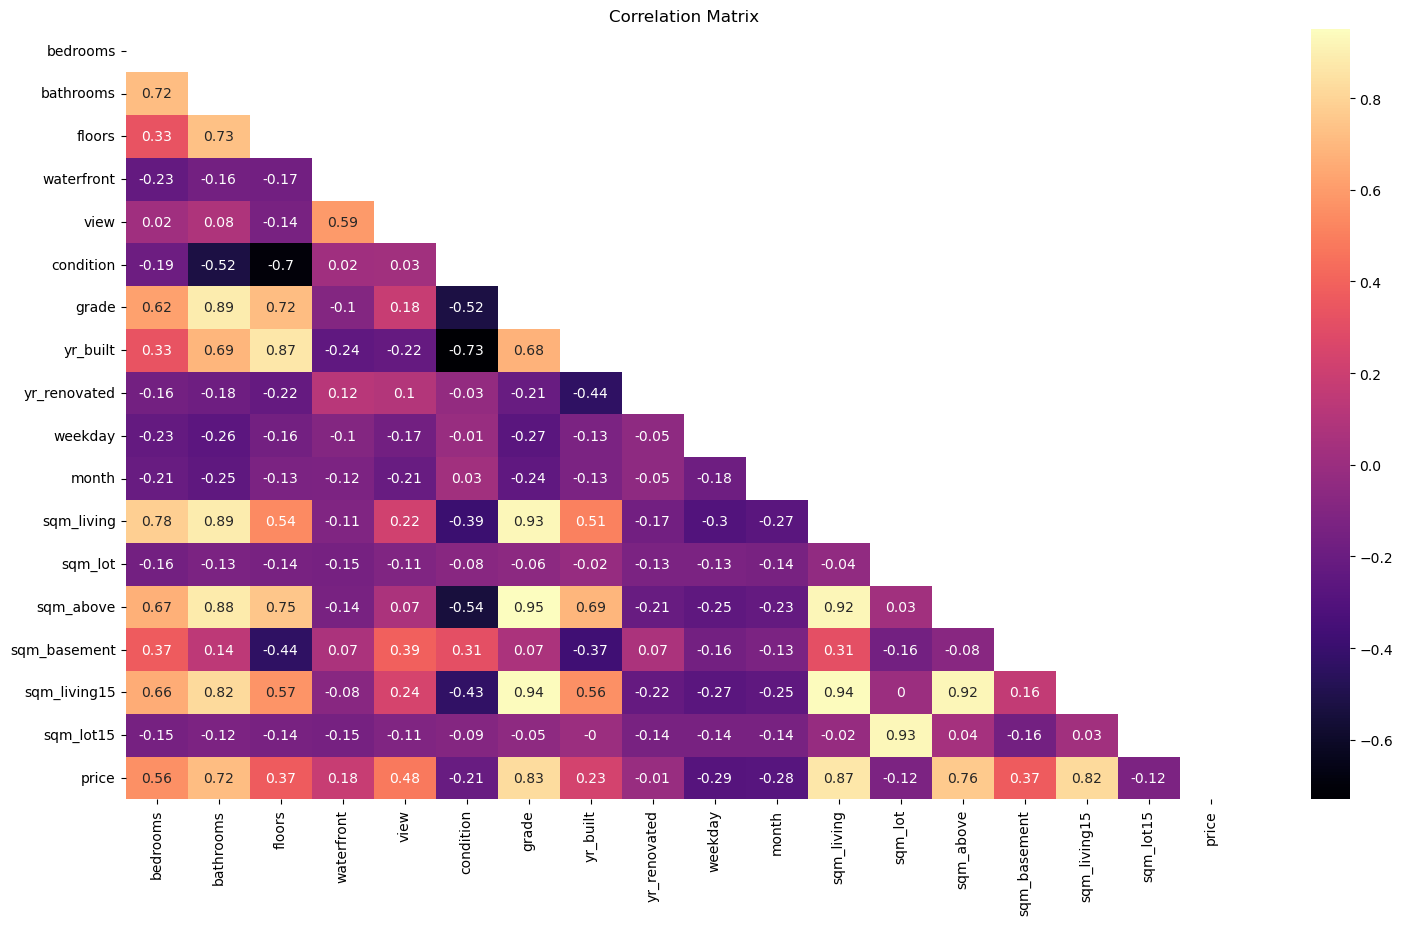

In [53]:
# Heatmap

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True
fig, map = plt.subplots(figsize=(18, 10))
map = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

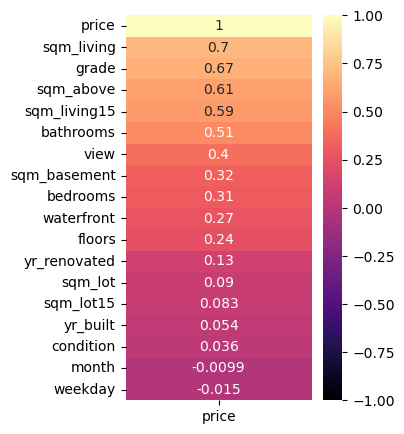

In [54]:
# Plotting correlation with price column
plt.figure(figsize=(3, 5))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='magma')

- bathrooms is highly correlated with sqm_lot15, sqm_above, sqm_living and grade. **sqm_lot15** less correlated with target -> DROP
- floors is highly correlated with yr_built. **yr_built** less correlated with target with target -> DROP
- grade is highly correlated with sqm_living15, sqm_above, sqm_living. **sqm_living15** less correlated with target -> DROP
- sqm_living is highly correlated with price, sqm_living15 and sqm_above. **sqm_living15** less correlated with target-> DROP
- sqm_lot is highly correlated with sqm_lot_15. **sqm_lot_15** less correlated with target -> DROP
- sqm_above is highly correlated with sqm_living 15. Keep both since both are highly correlated with target.


In [55]:
df2 = df.copy()

In [56]:
df2.drop(['yr_built', 'sqm_living15', 'sqm_lot15'], axis=1, inplace=True)

#### 4.4 Let's find out if dropping columns improved our models!

In [ ]:
X = df2.drop(['price'], axis=1)
y = df2['price']

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: 0.59

KNN Regressor: 0.46

RandomForest Regressor: 0.68
 
 
 Dropping columns did not improve R2 in any of our models!

## 5. Pre processing

### 5.1 Handling Null Values

In [ ]:
# df.isna().sum().to_frame().rename(columns={0:'count'}).sort_values(by='count', ascending=False)

In [57]:
# Get the proportion of nulls in our data.

nulls = pd.DataFrame(round(100*df.isna().sum()/len(df)))   #take the nulls, we sum them, and then divide to get the proportion
nulls.columns = ["nulls_prop"]
nulls = nulls.rename_axis("columns").reset_index()
nulls

columns  nulls_prop
0       bedrooms         0.0
1      bathrooms         0.0
2         floors         0.0
3     waterfront         0.0
4           view         0.0
5      condition         0.0
6          grade         0.0
7       yr_built         0.0
8   yr_renovated         0.0
9        weekday         0.0
10         month         0.0
11    sqm_living         0.0
12       sqm_lot         0.0
13     sqm_above         0.0
14  sqm_basement         0.0
15  sqm_living15         0.0
16     sqm_lot15         0.0
17         price         0.0

No Null values found in our Dataset.

### 5.2 Outliers

Some Machine Learning algorithms are more sensitive to outliers like Linear Regression and K-Nearest Neighbors. 

However Decision Tree and Random Forest are not sensitive to Outliers.


In [ ]:
#sns.boxplot(data=numerical_scale)
#plt.xticks(rotation=45, ha='right')

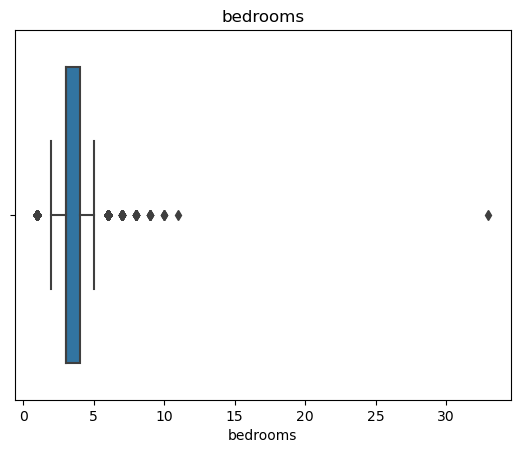

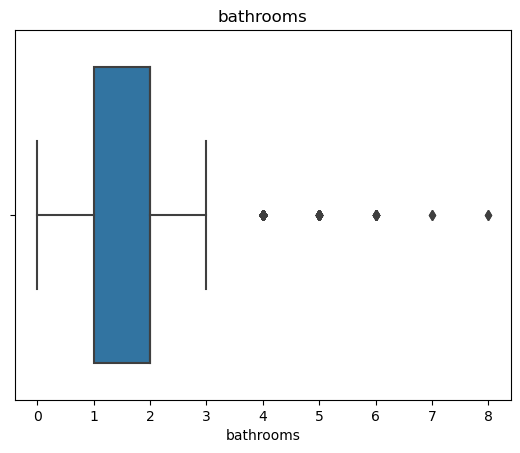

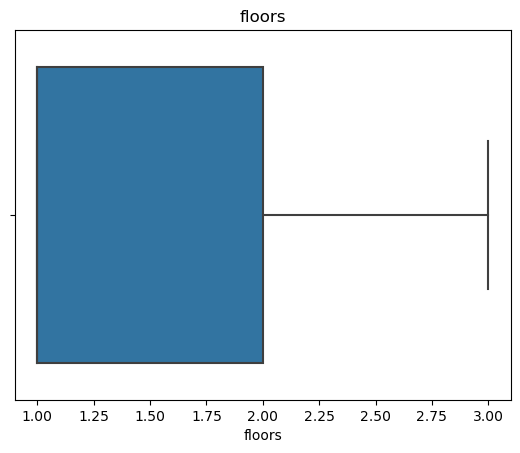

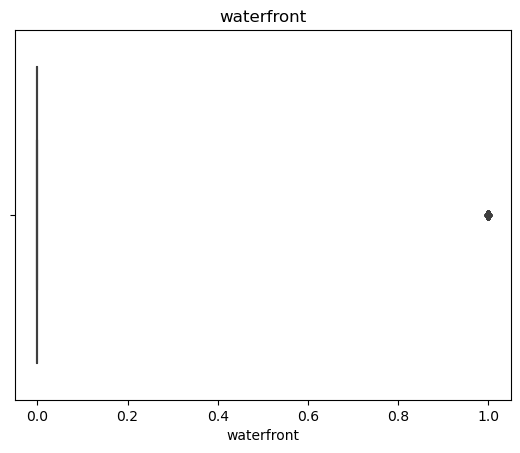

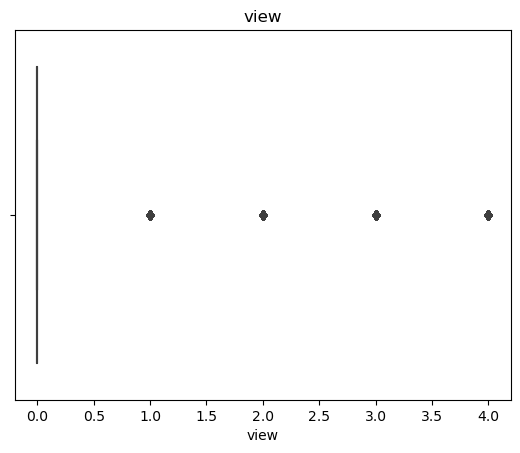

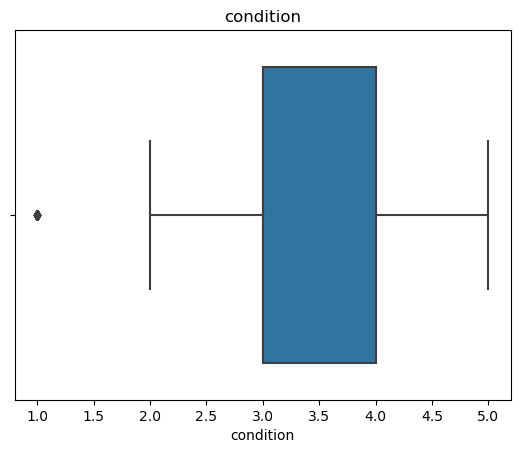

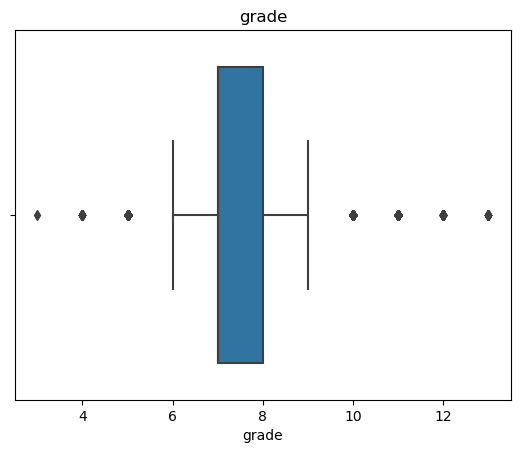

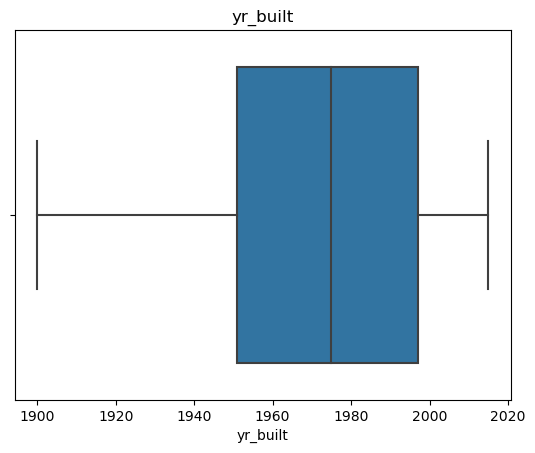

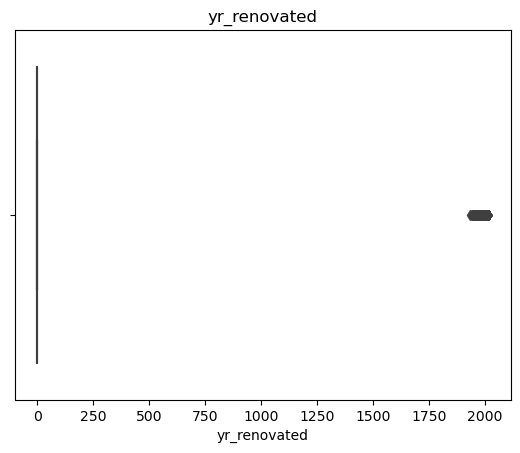

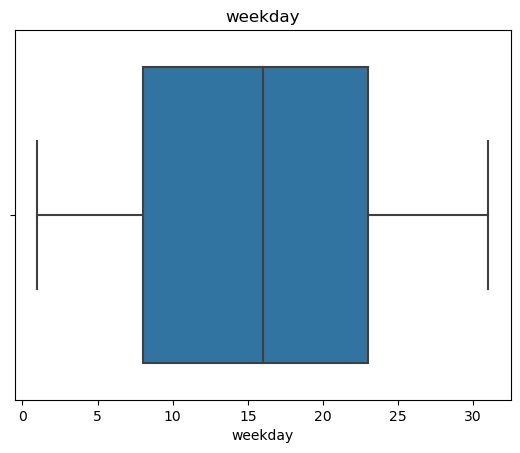

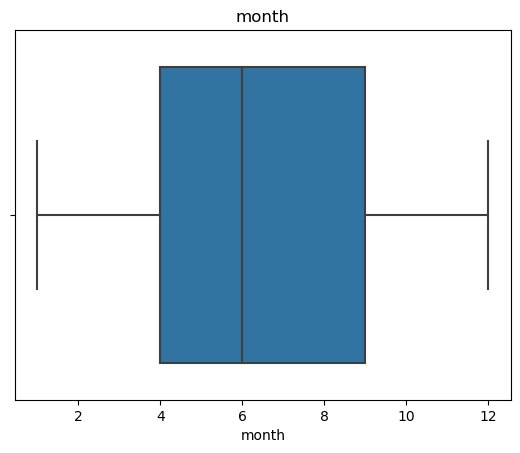

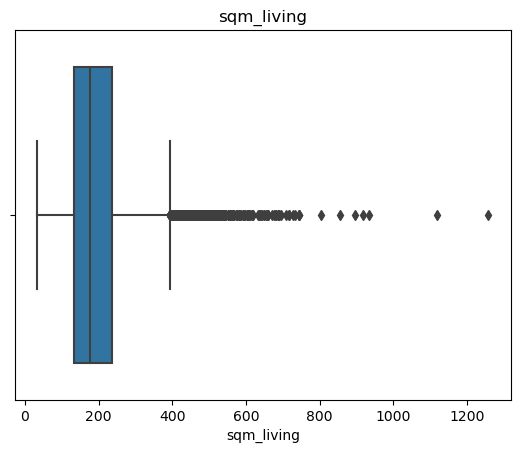

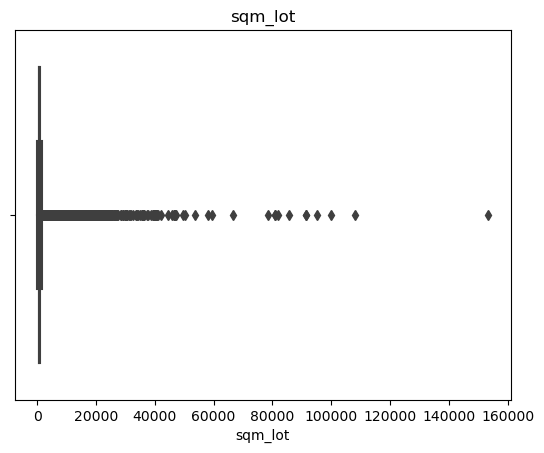

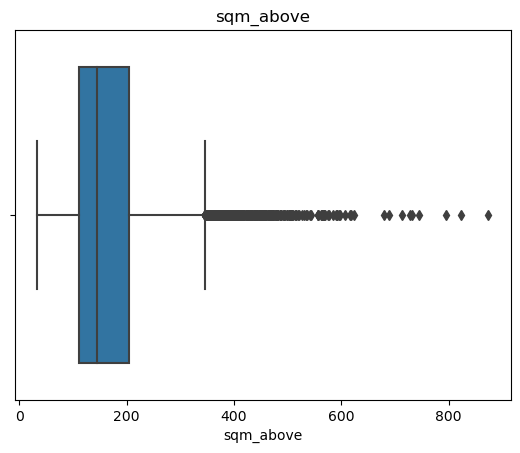

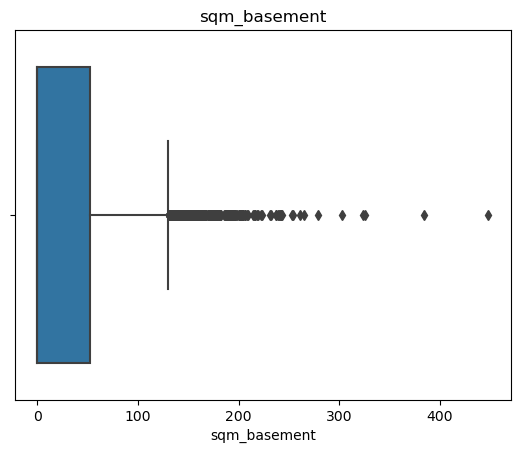

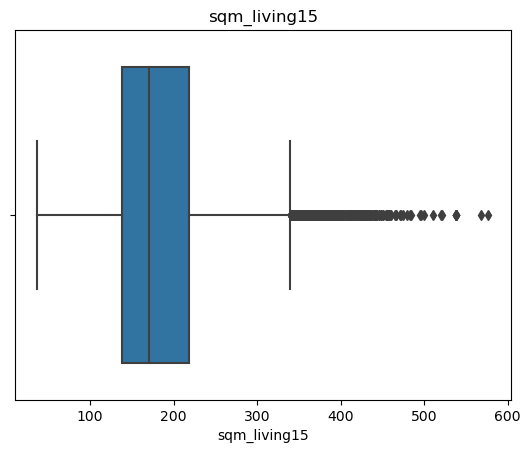

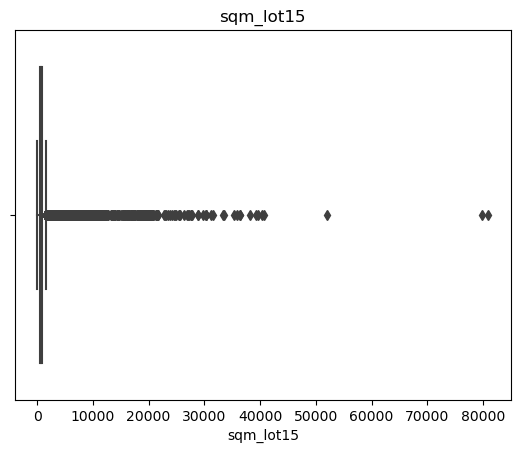

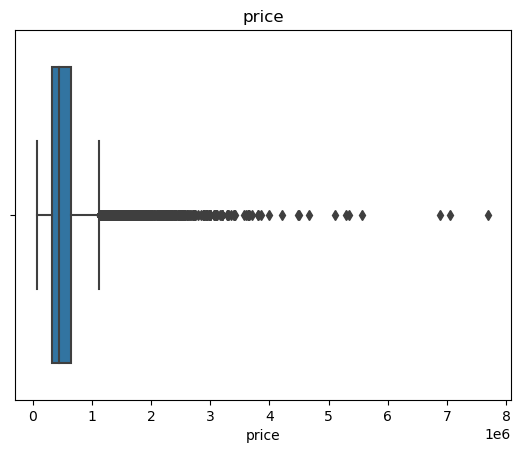

In [58]:
# Let's check them

for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [ ]:
#Let's remove them

#iqr = np.percentile(df['bedrooms'],75) - np.percentile(df['bedrooms'],25)


#Defining limits

#upper_limit = np.percentile(df['bedrooms'],75) + 1.5*iqr          

#lower_limit = np.percentile(df['bedrooms'],25) - 1.5*iqr


# Remove them from the data

#df_without_outliers = df[(df['bedrooms']>lower_limit) & (df['bedrooms']<upper_limit)]

In [59]:
def remove_outliers(df, threshold=1.5):
    numerical = df.select_dtypes(np.number)
    for column in numerical.columns:
        q3 = np.percentile(numerical[column], 75)
        q1 = np.percentile(numerical[column], 25)
        iqr = q3 - q1
        upper_limit = q3 + threshold * iqr
        lower_limit = q1 - threshold * iqr
        numerical[column] = np.where(numerical[column]> upper_limit, np.nan,
                            np.where(numerical[column]< lower_limit, np.nan,
                              numerical[column]))
    numerical.dropna(inplace=True)
    return numerical

In [60]:
df_o = df.copy()
df_o = remove_outliers(df_o, threshold=1.5) # a threshold of 1.5 is standard practice
print(df.shape)
print(df_o.shape)

(21597, 18)
(15090, 18)


**6507** rows were removed by removing Outliers from dataset. 
Let's try with a higher threshold in which less outliers are dropped, only the most extreme outliers.


In [61]:
df_o2 = df.copy()
df_o2 = remove_outliers(df_o2, threshold=4.5)
print(df.shape)
print(df_o2.shape)

(21597, 18)
(17334, 18)


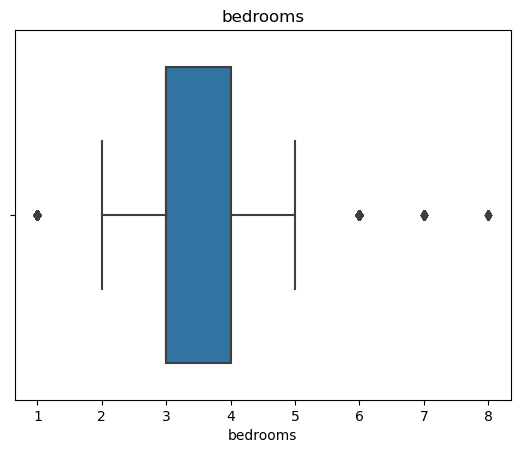

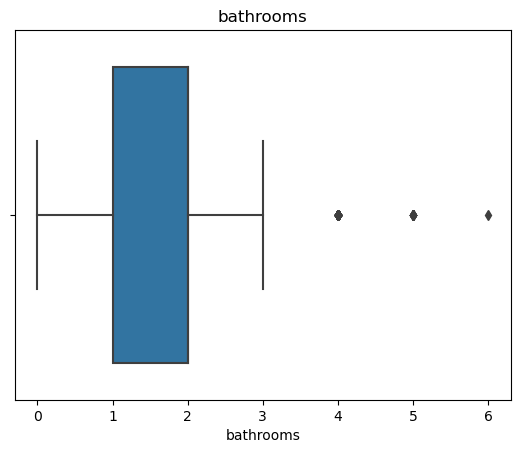

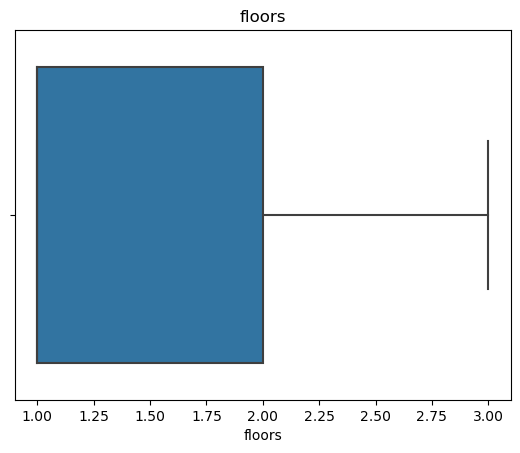

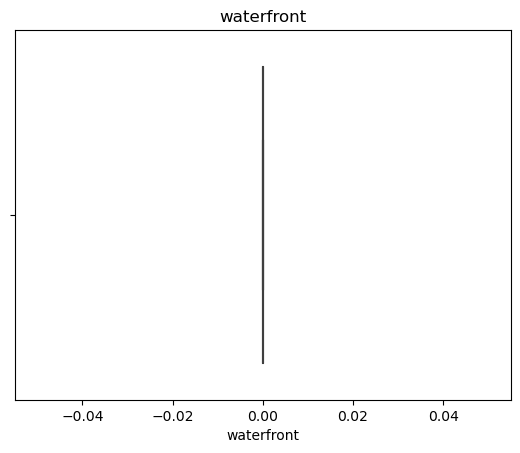

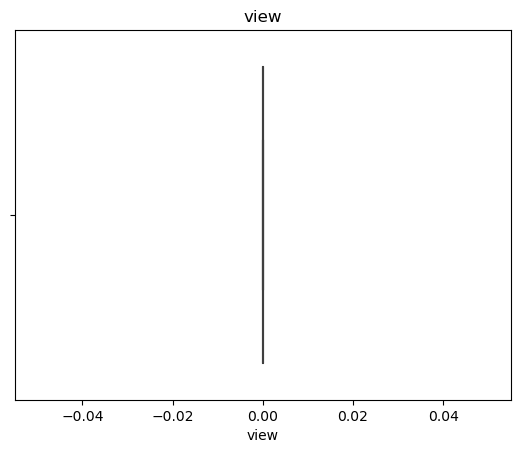

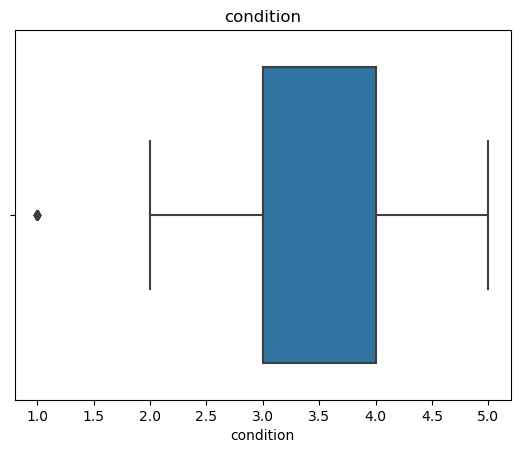

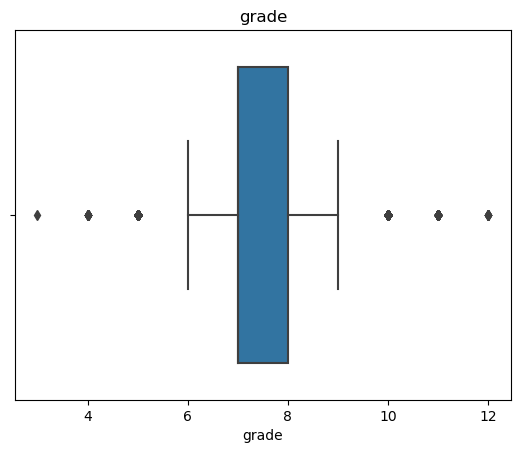

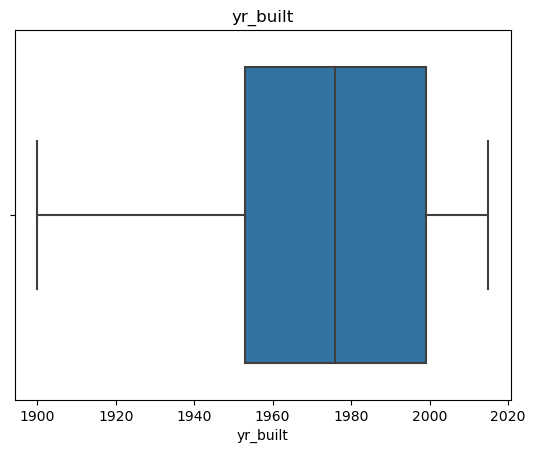

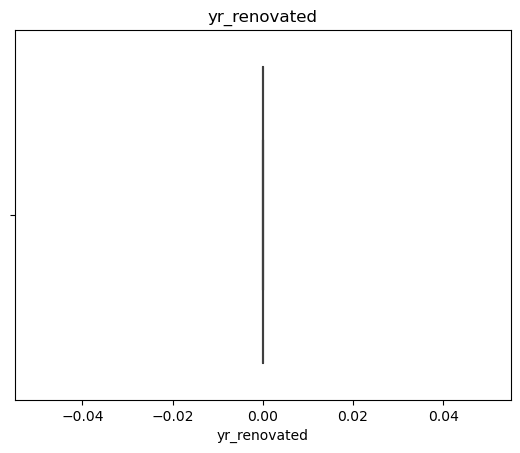

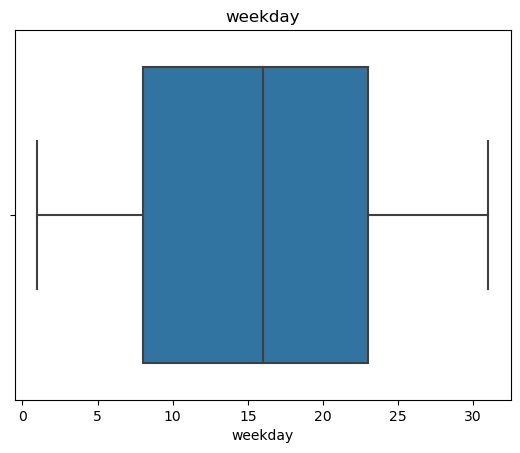

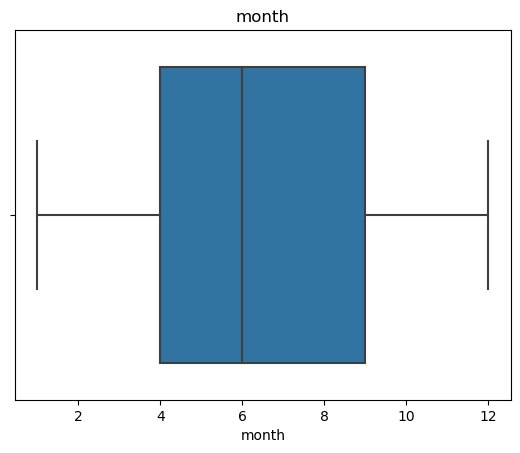

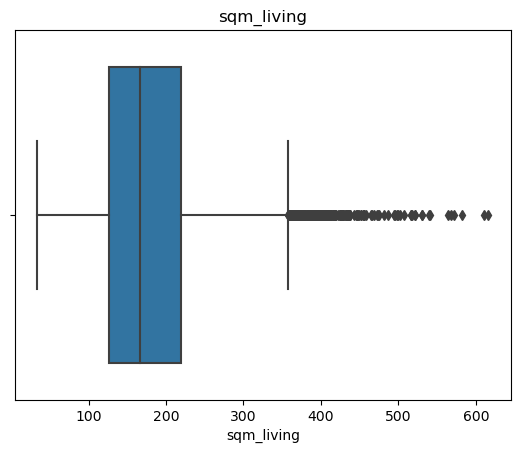

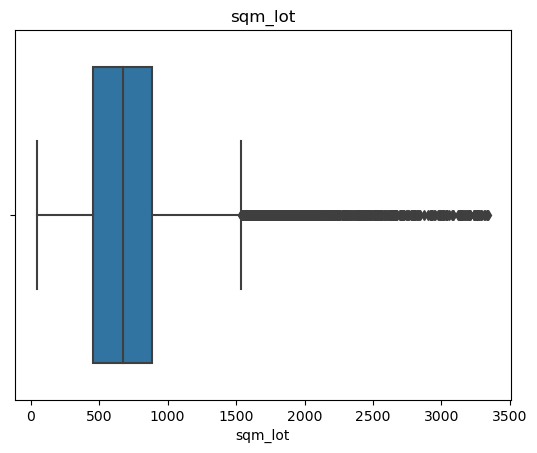

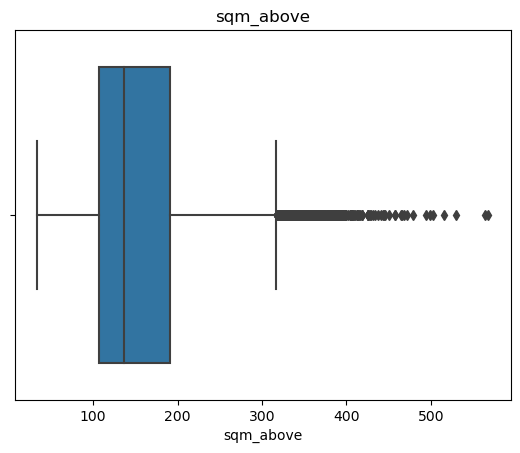

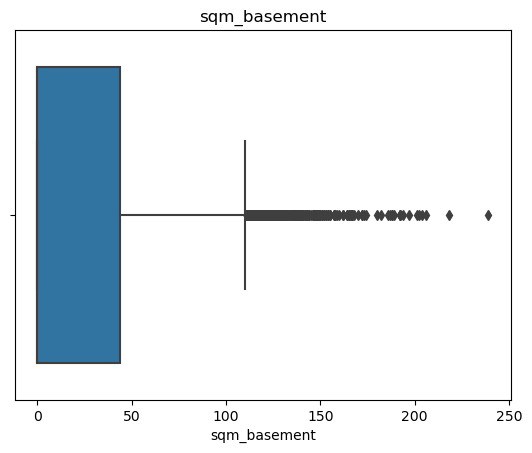

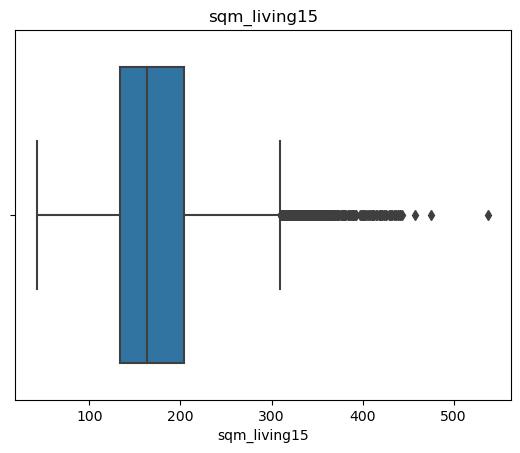

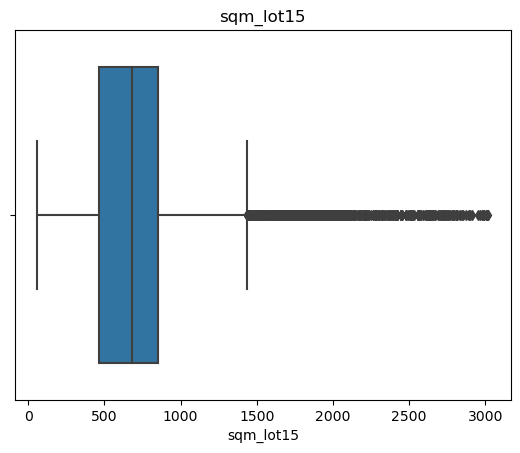

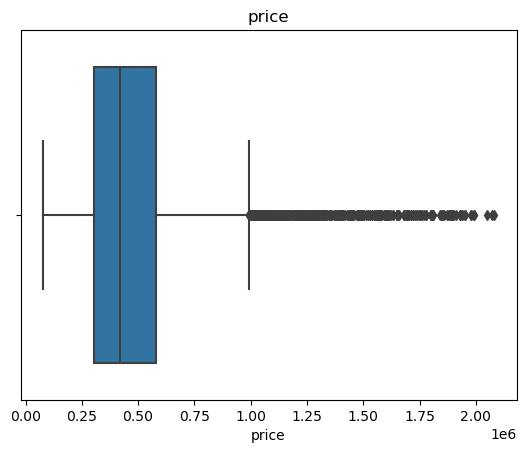

In [62]:
for col in df_o2.columns:
    sns.boxplot(x=df_o2[col])
    plt.title(col)
    plt.show()

Let's see if removing the Outliers improves our model!


In [ ]:
X = df_o2.drop(['price'], axis=1)
y = df_o2['price']

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: 0.58

KNN Regressor: 0.54

RandomForest Regressor: 0.69

The only one that improved was **KNN Regressor**. R2 improved from 0.51 to 0.54

### 5.3 Feature Engineering

#### 5.3.1 Binning / Bucketing

In [63]:
df1=df.copy()
df1.head()

bedrooms  bathrooms  floors  waterfront  view  condition  grade  yr_built  \
0         3          1       1           0     0          3      7      1955   
1         3          2       2           0     0          3      7      1951   
2         2          1       1           0     0          3      6      1933   
3         4          3       1           0     0          5      7      1965   
4         3          2       1           0     0          3      8      1987   

   yr_renovated  weekday  month  sqm_living  sqm_lot  sqm_above  sqm_basement  \
0             0       13     10       110.0    525.0      110.0           0.0   
1          1991        9     12       239.0    673.0      202.0          37.0   
2             0       25      2        72.0    929.0       72.0           0.0   
3             0        9     12       182.0    465.0       98.0          85.0   
4             0       18      2       156.0    751.0      156.0           0.0   

   sqm_living15  sqm_lot15   price  
0         124.0      525.0  221900  
1         157.0      710.0  538000  
2         253.0      749.0  180000  
3         126.0      465.0  604000  
4         167.0      697.0  510000

In [64]:
df1.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [65]:
# column "bedrooms"

#categorical['bedrooms_bin'] = pd.cut(x=df1['bedrooms'], bins=[0, 1, 2, 3, 4, 5, 35],
                     #labels=['1', '2', '3', '4', '5','6 and above'])
    
def group_bedroom(val):
    if val in [1]:
        return 0
    elif val in [2, 3]:
        return 1
    elif val in [4,5]:
        return 2
    else:
        return 3

In [66]:
df1['bedroom_group'] = df1['bedrooms'].apply(group_bedroom)

In [67]:
# column "bathrooms"
def group_bathroom(val):
    if val in [0, 1]:
        return 0
    elif val in [2, 3]:
        return 1
    else:
        return 2

In [68]:
df1['bathroom_group'] = df1['bathrooms'].apply(group_bathroom)

In [69]:
# column "view": viewed(1) or not viewed (0)

def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [70]:
df1['viewed_or_not'] = df1['view'].apply(viewed_or_not)

In [71]:
#column yr_built

df1["age"] = 2023 - df1["yr_built"]

In [72]:
def group_year(val):
    if val in [0, 30]:
        return 0
    elif val in [31, 60]:
        return 1
    elif val in [61, 90]:
        return 2
    else:
        return 3

In [73]:
df1['age_group'] = df1['age'].apply(group_year)

In [74]:
#column "yr_renovated" -> Renovated or Not.

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [75]:
df1['ren_or_not'] = df1['yr_renovated'].apply(ren_or_not)

In [76]:
#column month -> divide into quarters

def quarter(val):
      if val >= 1 and val <= 3:
        return 1 
      if val >= 4  and val <=6:
        return 2    
      if val >= 7 and val <= 9:
        return 3
      else:
        return 4

In [77]:
df1["quarter"] = df1["month"].apply(quarter)

In [78]:
# column day -> divide into fortnights
def fortnight_group(weekday):
     if weekday >= 1 and weekday <= 14:
        return 1 
     else:
        return 2

In [80]:
df1["fortnight"] = df1["weekday"].apply(fortnight_group)

In [ ]:
df1.columns

In [81]:
df1.drop(["bedrooms", "bathrooms","view", "yr_built", "yr_renovated", "age"], axis = 1, inplace=True)

In [ ]:
df1.head()

#### 5.3.1.1 Let's see if models improve with bucketing!

In [ ]:
X = df1.drop(['price'], axis=1)
y = df1['price']

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.60

KNN Regressor: R2 0.50

RandomForest Regressor: R2 0.71

None of our models performance have improved with Bucketing!!

### 5.3.2 Feature Scaling

#### 5.3.2.1 Data Normalization

In [ ]:
# Feature scaling is not important for algorithms such as random forest or decision trees which are scaling invariant.
#Important for Linear Regression as it requires normalization to imrove model performance

X = df1.drop(['price'], axis=1)
y = df1['price']
X

In [ ]:
#X_cont = X[['sqm_living', 'sqm_lot', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15']]

In [ ]:
#X_discrete = X[['floors', 'waterfront', 'condition', 'grade', 'weekday', 'month', 'bedroom_group', 'bathroom_group', 'viewed_or_not', 'age_group', 'ren_or_not', 'quarter', 'fortnight']]

In [ ]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

In [ ]:
X = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)

In [ ]:
X.describe()

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.60

KNN Regressor: R2 0.52

RandomForest Regressor: R2 0.71

None of our models performance have improved with Normalization!!

####  5.3.2.2 Data Normalization Standardization

In [ ]:
X = df1.drop(['price'], axis=1)
y = df1['price']
X

In [ ]:
transformer = StandardScaler().fit(X)
x_stand = transformer.transform(X)
print(x_stand.shape)

In [ ]:
X = pd.DataFrame(x_stand,index = X.index, columns=X.columns)

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.60

KNN Regressor: R2 0.63

RandomForest Regressor: R2 0.71

KNN Regressor was the only model that improved from 0.51 to 0.63 when feature scaling techniques - **standardization**

### 5.3.3 Feature Transformation

#### 5.3.3.1 Log transformation of our continuous numerical Data

In [82]:
cont_numerical = df[['sqm_living', 'sqm_lot', 'sqm_above', 'sqm_basement', 'sqm_living15', 'sqm_lot15']]

In [83]:
discr_numerical=df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'weekday', 'month']]

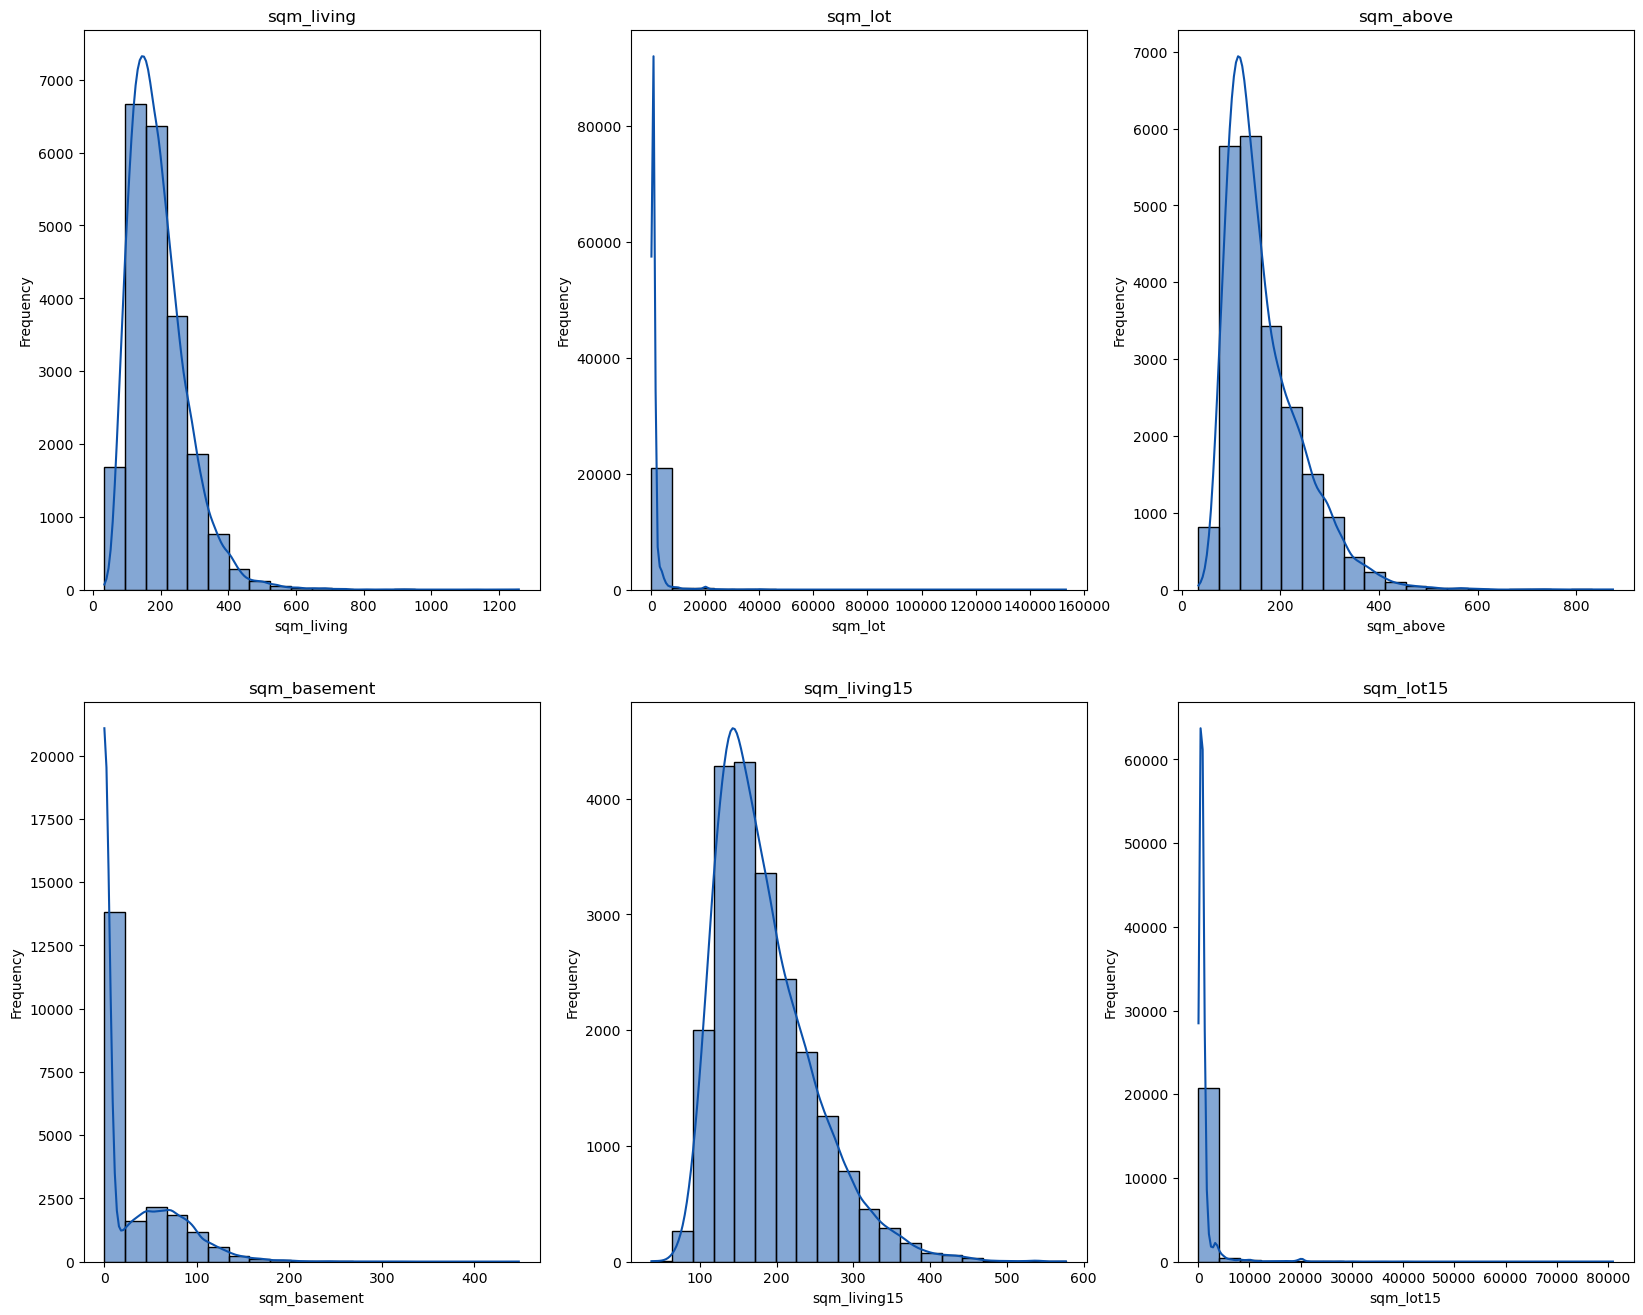

In [84]:
# Distribution before Log Tranformation

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
color = '#0B51AB'  
for i, ax in enumerate(axes.flat):
    if i >= len(cont_numerical.columns):
        break
    sns.histplot(data=cont_numerical, x=cont_numerical.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(cont_numerical.columns[i])
    ax.set_xlabel(cont_numerical.columns[i])
    ax.set_ylabel('Frequency')

In [86]:
log_transf = np.log(cont_numerical+1)

#Log transformation should only be applied to data that is positive, as the natural logarithm is not defined for values less than or equal to zero, therefore I had to add 1 to data to change "0" to 1.

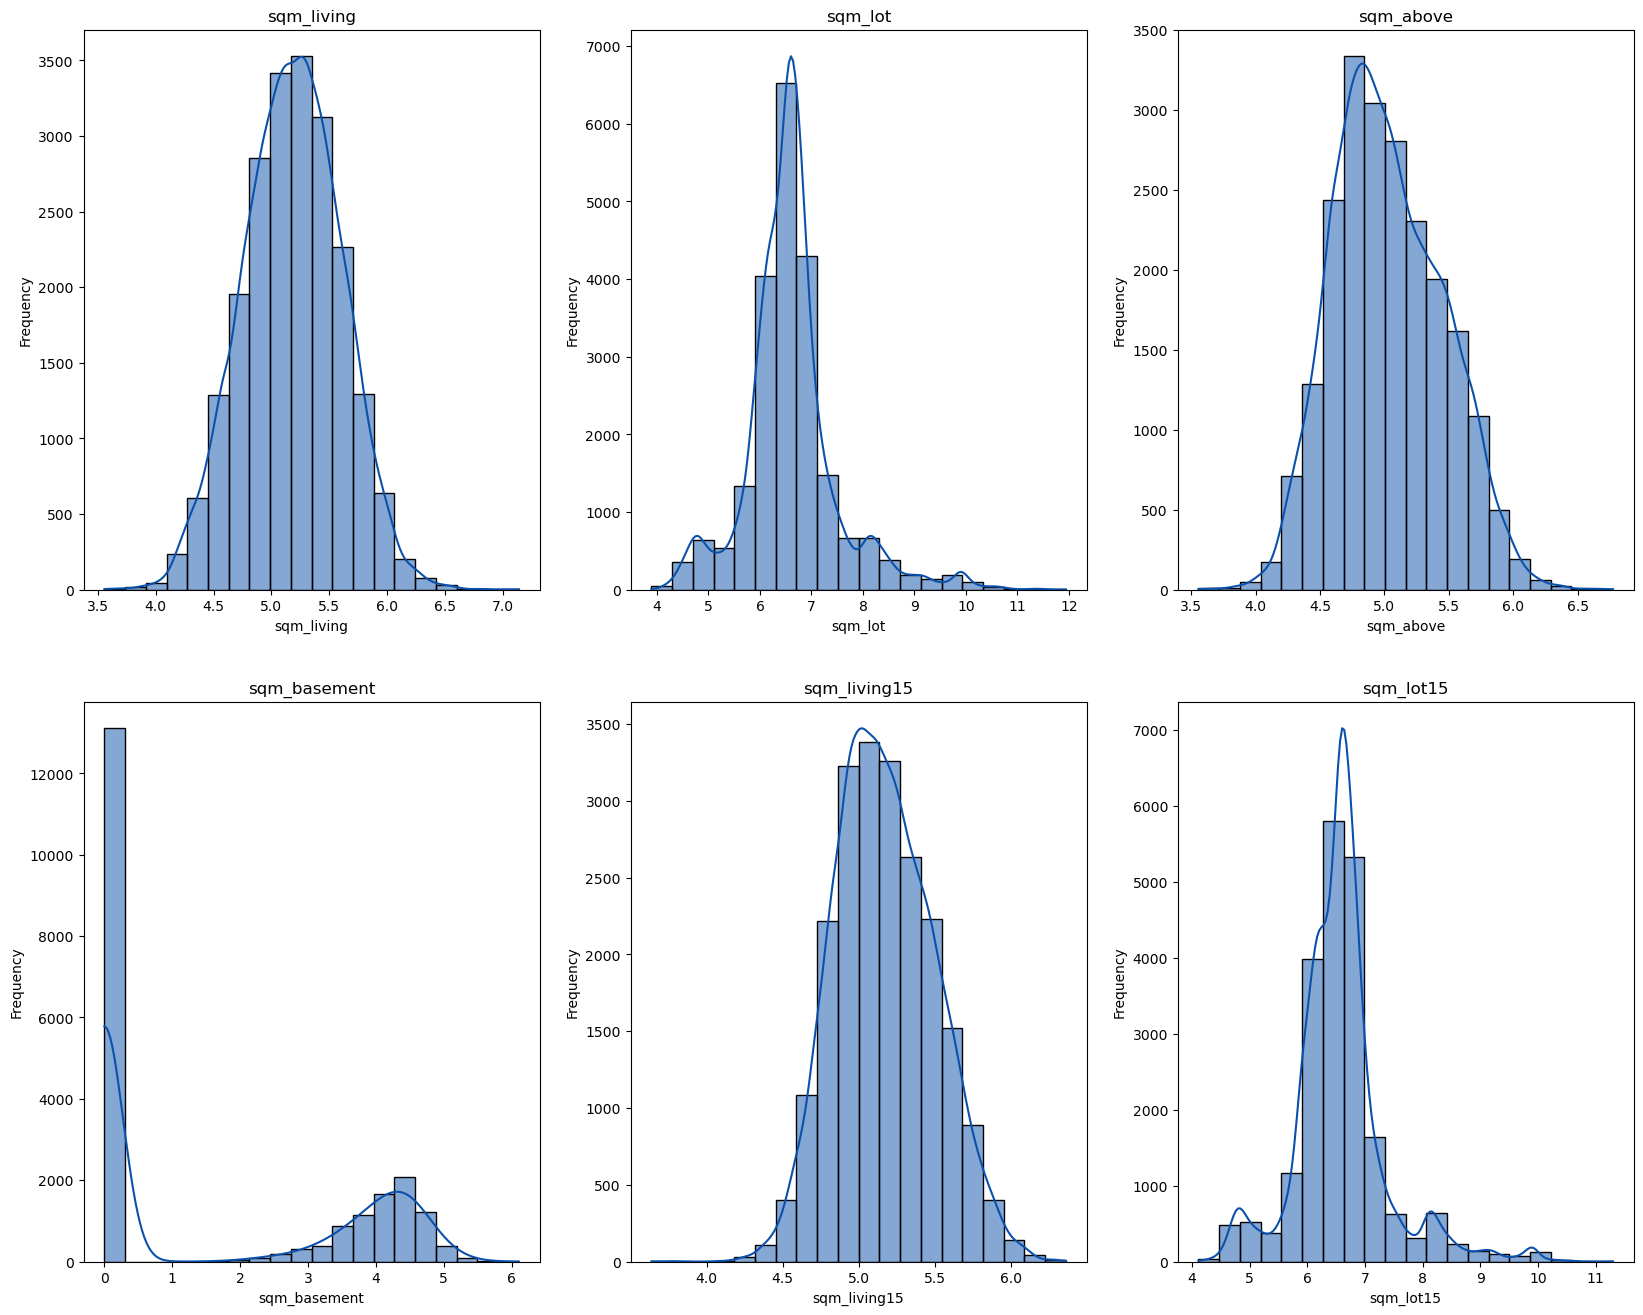

In [87]:
# Distribution after Log Transformation

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
color = '#0B51AB'  
for i, ax in enumerate(axes.flat):
    if i >= len(log_transf.columns):
        break
    sns.histplot(data=log_transf, x=log_transf.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(log_transf.columns[i])
    ax.set_xlabel(log_transf.columns[i])
    ax.set_ylabel('Frequency')


#### Log-transformation did reduce skewness of our continuous numerical data, it does look more like a normal distribution.

#### Let's see if it improved our models.

In [88]:
df_logtransf = pd.concat([log_transf, discr_numerical], axis = 1)

In [ ]:
X = df_logtransf
y = df['price']

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.60

KNN Regressor: R2 0.39

RandomForest Regressor: R2 0.75

No improvements. KNN Regressor got worst.

#### 5.3.3.2 Square Root Transformation

In [89]:
sqrt_transf = np.sqrt(cont_numerical)

In [ ]:
df_sqrt = pd.concat([sqrt_transf, discr_numerical], axis = 1)


In [ ]:
X = df_sqrt
y = df['price']

different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.62

KNN Regressor: R2 0.50

RandomForest Regressor: R2 0.75

No improvements.

#### 5.3.3.3 Box-Cox

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
def boxcox_transform(data):
    numeric_cols = X.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        X[column] = np.where(X[column]<=0, np.NAN, X[column]) 
        X[column] = X[column].fillna(X[column].mean())
        transformed_data, ci = stats.boxcox(X[column])
        X[column] = transformed_data
        _ci[column] = [ci] 
    return X, _ci
X, _ci = boxcox_transform(X)

In [ ]:
different_models(LinearRegression())
different_models(KNeighborsRegressor(n_neighbors=9, weights = 'distance'))
different_models(RandomForestRegressor(n_estimators=100, random_state=42))

Linear Regression: R2 0.62

KNN Regressor: R2 0.51

RandomForest Regressor: R2 0.73

No improvements.

### 6. Conclusion

Our best regression-based machine learning model was the **Random Forest Regressor**, with an R2 of 0.75.

Removing Outliers, Bucketing, Feature Scaling and Preprocessing did not improve our models performance.

A Random Forest Regression model is a powerful model which performs well with non-linear relationships, don't require feature scaling and can handle outliers automatically. 